In [1]:
import os.path as op
import json

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook', font_scale=1.2)

from pyplr import graphing, utils, preproc
from pyplr.plr import PLR
import numpy as np
import numpy as np
from scipy.signal import butter,filtfilt

In [2]:
!pip install tsmoothie


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [3]:
def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y
def json_reader(path_to_file):
    with open(path_to_file) as f:
        data = f.read()
  
    #print("Data type before reconstruction : ", type(data))
      
    # reconstructing the data as a dictionary
    js = json.loads(data)
  
    #print("Data type after reconstruction : ", type(js))
    #print(js)
    return js
def json_writer(DATA,participant_no):
# create json object from dictionary
    jsonobj = json.dumps(DATA)

# open file for writing, "w" 
    save_file = str(participant_no)+".json"
    f = open(save_file,"w")

# write json object to file
    f.write(jsonobj)
    f.close()
    return 0

In [4]:
# Some useful constants
SAMPLE_RATE = 200
#DURATION = 1500
#ONSET_IDX = 1
# Columns to load
use_cols = ['confidence',
            'method',
            'pupil_timestamp',
            'eye_id',
            'diameter_3d',
            'diameter']
# Pupil Labs recording directories / exports
subjects = {
    '001': ['/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0081/000', '000']
}
# Empty DataFrame to store processed PIPR data
df = pd.DataFrame()

# Loop over subjects
for k in subjects.keys():
    # Get a handle on a subject
    rec = subjects[k][0]
    export = subjects[k][1]
    s = utils.new_subject(
        rec, export=export, out_dir_nm='pyplr_analysis')

    # Load pupil data
    samples = utils.load_pupil(
        s['data_dir'], eye_id='right', method='3d', cols=use_cols)

    # Pupil columns to analyse
    pupil_cols = ['diameter_3d', 'diameter']
    

************************************************************
*************************** 000 ****************************
************************************************************
Loaded 4865 samples


In [5]:
blinks  = utils.load_blinks(s['data_dir'])
samples = preproc.mask_pupil_first_derivative(samples, threshold=4.0, mask_cols=pupil_cols)
samples = preproc.mask_blinks(samples, blinks, mask_cols=['diameter_3d'])

                    #Mask Pupil Confidence
samples = preproc.mask_pupil_confidence(samples, threshold=0.75, mask_cols=pupil_cols)


                    #Low Pass Filter the Samples at a 1 Hz Cut off
                    #try:
                        #Interpolate Samples 
samples = preproc.interpolate_pupil(samples, method='nearest', order=2,interp_cols=pupil_cols)
samples = preproc.butterworth_series(samples, fields=pupil_cols, filt_order=3,cutoff_freq=1/(200/2))

2 blinks detected by Pupil Labs (mean dur = 0.285 s)


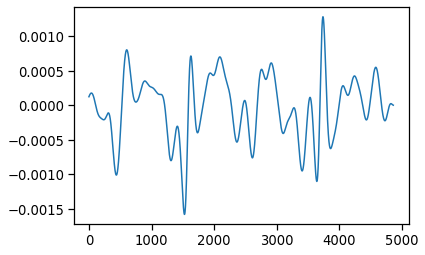

In [6]:
#plt.plot(samples.diameter_3d)
dy = np.diff(samples.diameter_3d)/4
plt.plot(dy)

In [311]:
participants = {}
for jmp in ([3,4,5,6,7,8,9,10,11,12,13,14]):
    participants[jmp] = []


************************************************************
*************************** 000 ****************************
************************************************************
Loaded 4861 samples
[Errno 2] No such file or directory: '/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0031/000/exports/000/blinks.csv'
no blinks
************************************************************
*************************** 001 ****************************
************************************************************
Loaded 3672 samples
[Errno 2] No such file or directory: '/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0031/001/exports/000/blinks.csv'
no blinks
************************************************************
*************************** 002 ****************************
************************************************************
Loaded 4159 samples
[Errno 2] No such file or directory: '/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0031/002/exports/000/blinks.c

************************************************************
*************************** 006 ****************************
************************************************************
Loaded 4892 samples
1 blinks detected by Pupil Labs (mean dur = 0.200 s)
************************************************************
*************************** 007 ****************************
************************************************************
Loaded 4614 samples
1 blinks detected by Pupil Labs (mean dur = 0.160 s)
************************************************************
*************************** 008 ****************************
************************************************************
Loaded 4649 samples
[Errno 2] No such file or directory: '/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0033/008/exports/000/blinks.csv'
no blinks
************************************************************
*************************** 009 ****************************
****************************

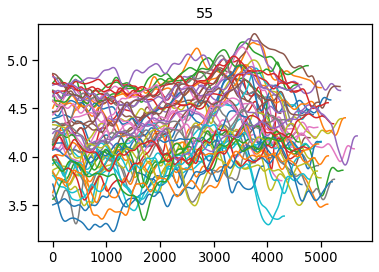

************************************************************
*************************** 000 ****************************
************************************************************
Loaded 3779 samples
2 blinks detected by Pupil Labs (mean dur = 0.172 s)
************************************************************
*************************** 001 ****************************
************************************************************
Loaded 4366 samples
1 blinks detected by Pupil Labs (mean dur = 0.235 s)
************************************************************
*************************** 002 ****************************
************************************************************
Loaded 4512 samples
5 blinks detected by Pupil Labs (mean dur = 0.362 s)
************************************************************
*************************** 003 ****************************
************************************************************
Loaded 5231 samples
5 blinks detected by Pupil La

************************************************************
*************************** 010 ****************************
************************************************************
Loaded 4393 samples
4 blinks detected by Pupil Labs (mean dur = 0.294 s)
************************************************************
*************************** 000 ****************************
************************************************************
Loaded 5325 samples
2 blinks detected by Pupil Labs (mean dur = 0.269 s)
************************************************************
*************************** 001 ****************************
************************************************************
Loaded 4267 samples
3 blinks detected by Pupil Labs (mean dur = 0.225 s)
************************************************************
*************************** 002 ****************************
************************************************************
Loaded 4916 samples
4 blinks detected by Pupil La

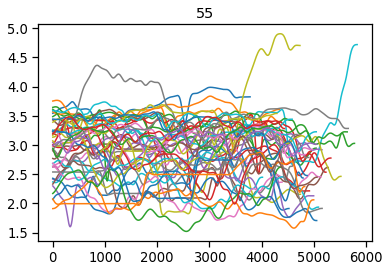

************************************************************
*************************** 000 ****************************
************************************************************
Loaded 3872 samples
[Errno 2] No such file or directory: '/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0051/000/exports/000/blinks.csv'
no blinks
************************************************************
*************************** 001 ****************************
************************************************************
Loaded 3880 samples
[Errno 2] No such file or directory: '/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0051/001/exports/000/blinks.csv'
no blinks
************************************************************
*************************** 002 ****************************
************************************************************
Loaded 3865 samples
[Errno 2] No such file or directory: '/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0051/002/exports/000/blinks.c

Loaded 5115 samples
1 blinks detected by Pupil Labs (mean dur = 0.188 s)
************************************************************
*************************** 008 ****************************
************************************************************
Loaded 4540 samples
3 blinks detected by Pupil Labs (mean dur = 0.735 s)
************************************************************
*************************** 009 ****************************
************************************************************
Loaded 4961 samples
3 blinks detected by Pupil Labs (mean dur = 0.560 s)
************************************************************
*************************** 010 ****************************
************************************************************
Loaded 4556 samples
1 blinks detected by Pupil Labs (mean dur = 1.791 s)
************************************************************
*************************** 000 ****************************
*************************************

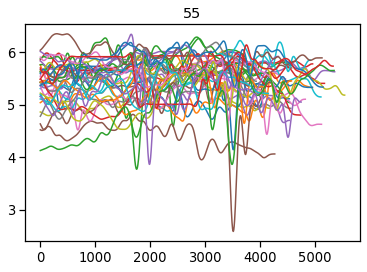

************************************************************
*************************** 000 ****************************
************************************************************
Loaded 4942 samples
3 blinks detected by Pupil Labs (mean dur = 0.320 s)
************************************************************
*************************** 001 ****************************
************************************************************
Loaded 4506 samples
1 blinks detected by Pupil Labs (mean dur = 13.227 s)
************************************************************
*************************** 002 ****************************
************************************************************
Loaded 4325 samples
1 blinks detected by Pupil Labs (mean dur = 0.220 s)
************************************************************
*************************** 003 ****************************
************************************************************
Loaded 4172 samples
1 blinks detected by Pupil L

Loaded 4863 samples
1 blinks detected by Pupil Labs (mean dur = 0.166 s)
************************************************************
*************************** 008 ****************************
************************************************************
Loaded 4866 samples
1 blinks detected by Pupil Labs (mean dur = 0.170 s)
************************************************************
*************************** 009 ****************************
************************************************************
Loaded 5018 samples
[Errno 2] No such file or directory: '/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0063/009/exports/000/blinks.csv'
no blinks
************************************************************
*************************** 010 ****************************
************************************************************
Loaded 5463 samples
1 blinks detected by Pupil Labs (mean dur = 1.567 s)
************************************************************
****************

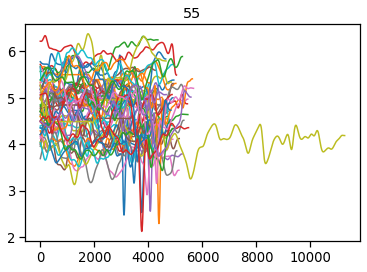

************************************************************
*************************** 000 ****************************
************************************************************
Loaded 4240 samples
3 blinks detected by Pupil Labs (mean dur = 0.193 s)
************************************************************
*************************** 001 ****************************
************************************************************
Loaded 5040 samples
3 blinks detected by Pupil Labs (mean dur = 0.190 s)
************************************************************
*************************** 002 ****************************
************************************************************
Loaded 5197 samples
3 blinks detected by Pupil Labs (mean dur = 0.170 s)
************************************************************
*************************** 003 ****************************
************************************************************
Loaded 4505 samples
2 blinks detected by Pupil La

Loaded 4706 samples
[Errno 2] No such file or directory: '/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0073/009/exports/000/blinks.csv'
no blinks
************************************************************
*************************** 010 ****************************
************************************************************
Loaded 4836 samples
1 blinks detected by Pupil Labs (mean dur = 0.160 s)
************************************************************
*************************** 000 ****************************
************************************************************
Loaded 4240 samples
3 blinks detected by Pupil Labs (mean dur = 2.188 s)
************************************************************
*************************** 001 ****************************
************************************************************
Loaded 4589 samples
1 blinks detected by Pupil Labs (mean dur = 0.210 s)
************************************************************
****************

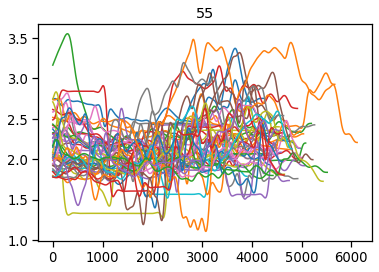

************************************************************
*************************** 000 ****************************
************************************************************
Loaded 4865 samples
2 blinks detected by Pupil Labs (mean dur = 0.285 s)
************************************************************
*************************** 001 ****************************
************************************************************
Loaded 4009 samples
1 blinks detected by Pupil Labs (mean dur = 5.423 s)
************************************************************
*************************** 002 ****************************
************************************************************
Loaded 3976 samples
1 blinks detected by Pupil Labs (mean dur = 0.271 s)
************************************************************
*************************** 003 ****************************
************************************************************
Loaded 3947 samples
2 blinks detected by Pupil La

Loaded 5442 samples
3 blinks detected by Pupil Labs (mean dur = 0.272 s)
************************************************************
*************************** 003 ****************************
************************************************************
Loaded 4833 samples
4 blinks detected by Pupil Labs (mean dur = 0.316 s)
************************************************************
*************************** 004 ****************************
************************************************************
Loaded 5368 samples
3 blinks detected by Pupil Labs (mean dur = 0.402 s)
************************************************************
*************************** 005 ****************************
************************************************************
Loaded 5669 samples
3 blinks detected by Pupil Labs (mean dur = 0.284 s)
************************************************************
*************************** 006 ****************************
*************************************

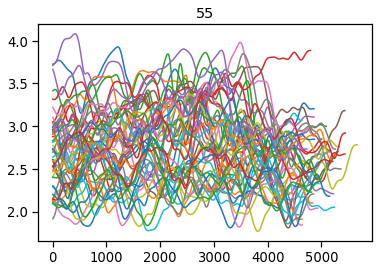

************************************************************
*************************** 000 ****************************
************************************************************
Loaded 4136 samples
18 blinks detected by Pupil Labs (mean dur = 0.297 s)
************************************************************
*************************** 001 ****************************
************************************************************
Loaded 4214 samples
22 blinks detected by Pupil Labs (mean dur = 0.295 s)
************************************************************
*************************** 002 ****************************
************************************************************
Loaded 4713 samples
19 blinks detected by Pupil Labs (mean dur = 0.192 s)
************************************************************
*************************** 003 ****************************
************************************************************
Loaded 3604 samples
17 blinks detected by Pupi

Loaded 4981 samples
18 blinks detected by Pupil Labs (mean dur = 0.354 s)
************************************************************
*************************** 000 ****************************
************************************************************
Loaded 5173 samples
19 blinks detected by Pupil Labs (mean dur = 0.229 s)
************************************************************
*************************** 001 ****************************
************************************************************
Loaded 4243 samples
14 blinks detected by Pupil Labs (mean dur = 0.714 s)
************************************************************
*************************** 002 ****************************
************************************************************
Loaded 4462 samples
18 blinks detected by Pupil Labs (mean dur = 0.248 s)
************************************************************
*************************** 003 ****************************
*********************************

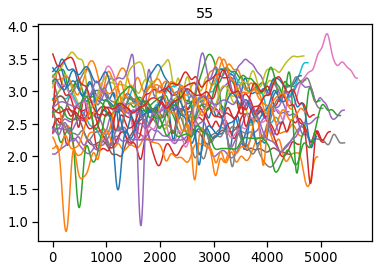

************************************************************
*************************** 000 ****************************
************************************************************
Loaded 4332 samples
6 blinks detected by Pupil Labs (mean dur = 0.138 s)
************************************************************
*************************** 001 ****************************
************************************************************
Loaded 4360 samples
7 blinks detected by Pupil Labs (mean dur = 1.346 s)
************************************************************
*************************** 002 ****************************
************************************************************
Loaded 3914 samples
6 blinks detected by Pupil Labs (mean dur = 0.339 s)
************************************************************
*************************** 003 ****************************
************************************************************
Loaded 4122 samples
3 blinks detected by Pupil La

************************************************************
*************************** 002 ****************************
************************************************************
Loaded 4520 samples
5 blinks detected by Pupil Labs (mean dur = 1.428 s)
************************************************************
*************************** 003 ****************************
************************************************************
Loaded 4311 samples
3 blinks detected by Pupil Labs (mean dur = 4.093 s)
************************************************************
*************************** 004 ****************************
************************************************************
Loaded 4037 samples
1 blinks detected by Pupil Labs (mean dur = 0.134 s)
************************************************************
*************************** 005 ****************************
************************************************************
Loaded 5064 samples
5 blinks detected by Pupil La

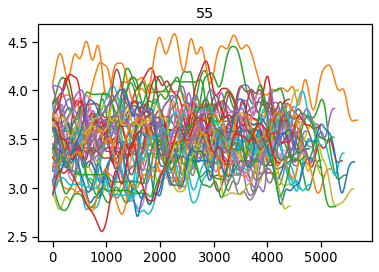

************************************************************
*************************** 000 ****************************
************************************************************
Loaded 5089 samples
12 blinks detected by Pupil Labs (mean dur = 0.451 s)
************************************************************
*************************** 001 ****************************
************************************************************
Loaded 4726 samples
12 blinks detected by Pupil Labs (mean dur = 0.220 s)
************************************************************
*************************** 002 ****************************
************************************************************
Loaded 3962 samples
11 blinks detected by Pupil Labs (mean dur = 0.405 s)
************************************************************
*************************** 003 ****************************
************************************************************
Loaded 4548 samples
7 blinks detected by Pupil

Loaded 4889 samples
3 blinks detected by Pupil Labs (mean dur = 5.488 s)
************************************************************
*************************** 002 ****************************
************************************************************
Loaded 4639 samples
8 blinks detected by Pupil Labs (mean dur = 0.869 s)
************************************************************
*************************** 003 ****************************
************************************************************
Loaded 5634 samples
10 blinks detected by Pupil Labs (mean dur = 0.892 s)
************************************************************
*************************** 004 ****************************
************************************************************
Loaded 4451 samples
5 blinks detected by Pupil Labs (mean dur = 1.864 s)
************************************************************
*************************** 005 ****************************
************************************

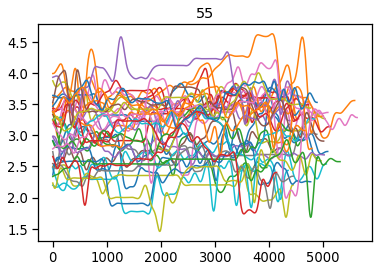

************************************************************
*************************** 000 ****************************
************************************************************
Loaded 3885 samples
5 blinks detected by Pupil Labs (mean dur = 1.697 s)
************************************************************
*************************** 001 ****************************
************************************************************
Loaded 4697 samples
4 blinks detected by Pupil Labs (mean dur = 3.009 s)
************************************************************
*************************** 002 ****************************
************************************************************
Loaded 4845 samples
3 blinks detected by Pupil Labs (mean dur = 5.504 s)
************************************************************
*************************** 003 ****************************
************************************************************
Loaded 4158 samples
[Errno 2] No such file or dir

Loaded 5175 samples
4 blinks detected by Pupil Labs (mean dur = 3.185 s)
************************************************************
*************************** 000 ****************************
************************************************************
Loaded 4975 samples
2 blinks detected by Pupil Labs (mean dur = 0.297 s)
************************************************************
*************************** 001 ****************************
************************************************************
Loaded 5405 samples
5 blinks detected by Pupil Labs (mean dur = 2.817 s)
************************************************************
*************************** 002 ****************************
************************************************************
Loaded 4168 samples
1 blinks detected by Pupil Labs (mean dur = 9.107 s)
************************************************************
*************************** 003 ****************************
*************************************

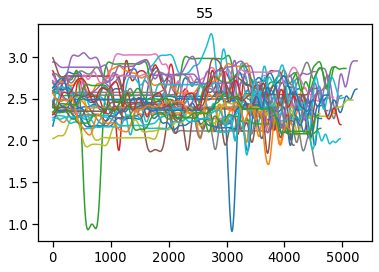

************************************************************
*************************** 000 ****************************
************************************************************
Loaded 3881 samples
7 blinks detected by Pupil Labs (mean dur = 0.680 s)
************************************************************
*************************** 001 ****************************
************************************************************
Loaded 4269 samples
9 blinks detected by Pupil Labs (mean dur = 0.235 s)
************************************************************
*************************** 002 ****************************
************************************************************
Loaded 3530 samples
8 blinks detected by Pupil Labs (mean dur = 0.852 s)
************************************************************
*************************** 003 ****************************
************************************************************
Loaded 4080 samples
6 blinks detected by Pupil La

6 blinks detected by Pupil Labs (mean dur = 1.811 s)
************************************************************
*************************** 000 ****************************
************************************************************
Loaded 4767 samples
11 blinks detected by Pupil Labs (mean dur = 0.338 s)
************************************************************
*************************** 001 ****************************
************************************************************
Loaded 5001 samples
8 blinks detected by Pupil Labs (mean dur = 1.292 s)
************************************************************
*************************** 002 ****************************
************************************************************
Loaded 4596 samples
8 blinks detected by Pupil Labs (mean dur = 1.484 s)
************************************************************
*************************** 003 ****************************
********************************************************

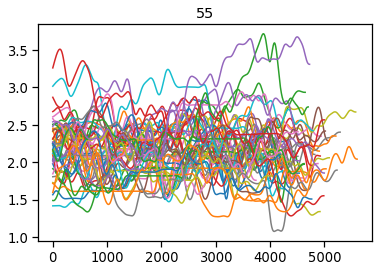

************************************************************
*************************** 000 ****************************
************************************************************
Loaded 4161 samples
4 blinks detected by Pupil Labs (mean dur = 0.212 s)
************************************************************
*************************** 001 ****************************
************************************************************
Loaded 4364 samples
6 blinks detected by Pupil Labs (mean dur = 0.224 s)
************************************************************
*************************** 002 ****************************
************************************************************
Loaded 3563 samples
2 blinks detected by Pupil Labs (mean dur = 0.245 s)
************************************************************
*************************** 003 ****************************
************************************************************
Loaded 4525 samples
6 blinks detected by Pupil La

Loaded 4785 samples
4 blinks detected by Pupil Labs (mean dur = 2.348 s)
************************************************************
*************************** 000 ****************************
************************************************************
Loaded 5430 samples
8 blinks detected by Pupil Labs (mean dur = 0.203 s)
************************************************************
*************************** 001 ****************************
************************************************************
Loaded 4293 samples
5 blinks detected by Pupil Labs (mean dur = 0.826 s)
************************************************************
*************************** 002 ****************************
************************************************************
Loaded 5600 samples
6 blinks detected by Pupil Labs (mean dur = 1.810 s)
************************************************************
*************************** 003 ****************************
*************************************

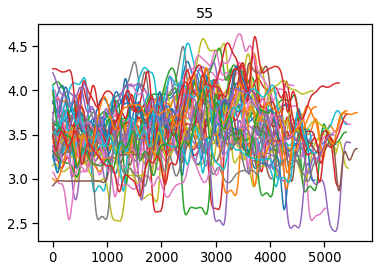

In [319]:
prcs = []
percsmain =[]
prcsmax=[]
for jmp in ([3,4,5,6,7,8,9,10,11,12,13,14]):
    where = []
    cnts = []
    cnt1 = 0
    percs1=[]
    percs2=[]
    for j in ([jmp]):
        cnts.append(cnt1)
        percsmain.append(percs2)
        cnt1 = 0
        for k in ([1,2,3,4,5]):
            percs2.append(percs1)
            for i in range(11):
                path = '/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/' + '00' + str(j) +str(k) + '/' + '00'+str(i)
                if(j>9):
                    path = '/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/' + '0' + str(j) +str(k) +  '/' + '00'+str(i)
                    if(i == 10):
                        path =path = '/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/' + '0' + str(j) +str(k) +  '/' + '0'+str(i)
                else:
                    if(i == 10):
                        path = '/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/' + '00' + str(j) +str(k) + '/' + '0'+str(i)
    #             try:
                samples = extract_timeseries(path)
                samples =samples.reset_index()
                confidence = np.size(np.where(samples['confidence']<0.90)[0])
                all_values =  np.size(samples['confidence'])
                percs = confidence/all_values
                #percs = interpolation/all_values
                percs1.append(percs)
                cnt1 = cnt1+1
               # if(min(samples.diameter)<1.5):
                #    where.append((str(len(samples.diameter))+'-'+str(j)+'-'+str(k)+'-'+str(i)))
                for arrs in (np.asarray(samples.diameter_3d)):
                    participants[jmp].append(arrs)
                plt.plot(samples.diameter_3d)

    #             except:
    #                 continue
    cnts.append(cnt1)
    plt.title(cnt1) 
    plt.savefig(str(j)+'3d.png')
    plt.show()
    prcs.append(np.mean(percsmain))
    prcsmax.append(np.max(percsmain))


In [342]:
prcs

[0.005923460304817138,
 0.054620509014856024,
 0.1899341954491063,
 0.15605637042576098,
 0.1568952628983694,
 0.13631262458263915,
 0.15537996485795752,
 0.14084574927743473,
 0.14180039362663807,
 0.14674896963385484,
 0.1422922721530866,
 0.14402369133755907]

In [341]:
percsmain[2]

[[0.7417355371900827,
  0.6556701030927835,
  0.7619663648124192,
  0.9767211490837048,
  0.9970181621035511,
  0.9920449227889565,
  0.9724417859431745,
  0.7119409109560936,
  0.8305376344086022,
  0.9372040354128063,
  0.9234756850160454,
  0.35629453681710216,
  0.9345412039742841,
  0.9900588354635829,
  0.981239460370995,
  0.9314676068752754,
  0.9293622674933569,
  0.9832289351384118,
  0.9820317899101589,
  0.9902932254802831,
  0.9705210237659964,
  0.9490825688073394,
  0.037126010045861545,
  0.08299758259468171,
  0.05497577338799851,
  0.10633187772925765,
  0.12508391138957262,
  0.033070521243977226,
  0.10296934865900383,
  0.1032258064516129,
  0.06982378854625551,
  0.23301753678693812,
  0.17998244073748904,
  0.17258687258687258,
  0.08305794227803481,
  0.44227820372398685,
  0.5261850548540675,
  0.4222496909765142,
  0.3664177306673091,
  0.2027219175299614,
  0.2645161290322581,
  0.3450535051321249,
  0.20240096038415367,
  0.1654388549778994,
  0.091013824884

In [157]:
where

['3865-5-1-2', '4274-5-1-5', '4565-5-4-2', '5356-5-5-8', '4755-5-5-10']

(array([0.04640266, 0.16995828, 0.38960862, 0.7526064 , 0.95536624,
        0.75713394, 0.83615336, 0.69823897, 0.23134802, 0.04808432]),
 array([3.22463139, 3.42934384, 3.63405629, 3.83876874, 4.04348119,
        4.24819363, 4.45290608, 4.65761853, 4.86233098, 5.06704343,
        5.27175587]),
 <BarContainer object of 10 artists>)

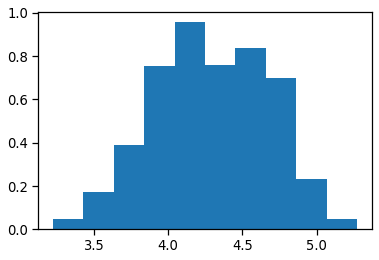

In [253]:
plt.hist(participants[3],density=True,label="Sample")

In [279]:
import copy

# Create a deep copy of the dictionary
participants_copy = copy.deepcopy(participants)

In [381]:

max_length = max(len(v) for v in participants.values())

# Step 2: Append None values to the end of each list
for key, value in participants.items():
    while len(value) < max_length:
        value.append(None)

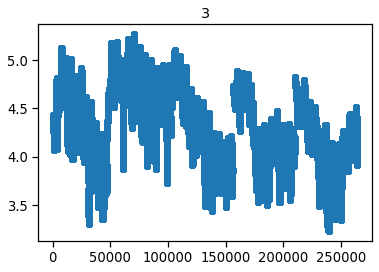

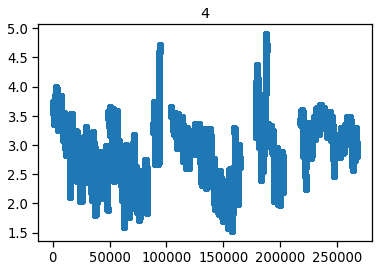

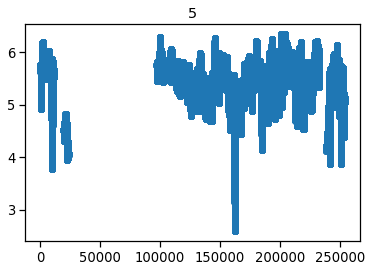

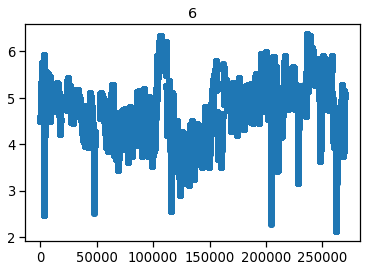

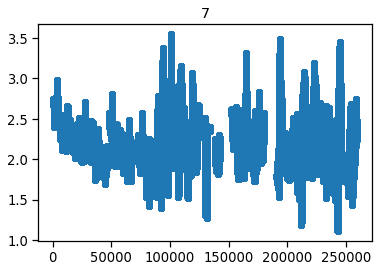

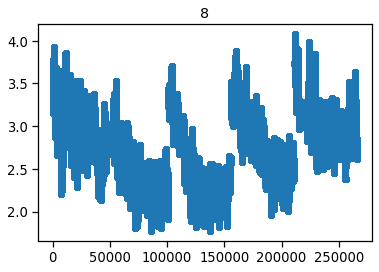

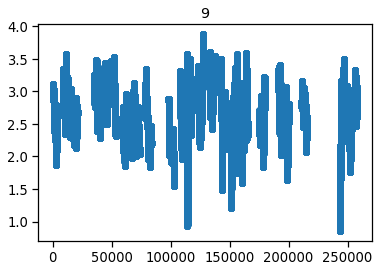

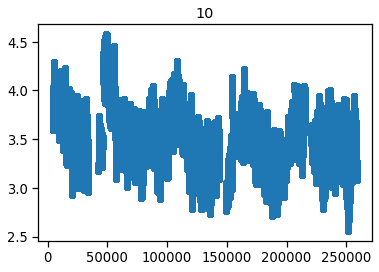

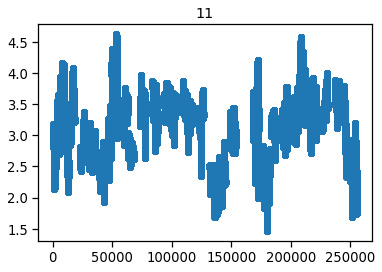

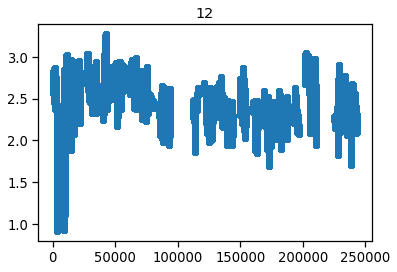

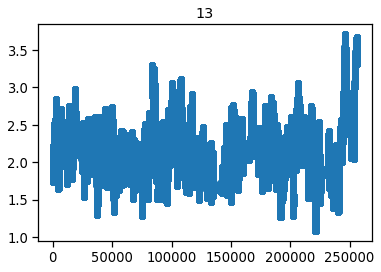

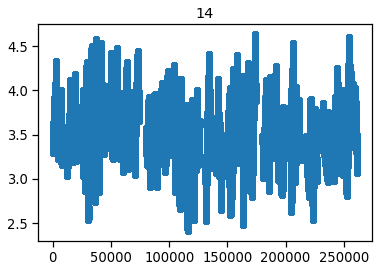

In [315]:
stds =[]
for jmp in ([3,4,5,6,7,8,9,10,11,12,13,14]):
    plt.figure()
    plt.scatter(np.arange(max_length),participants_copy[jmp])
    plt.title(jmp)
    #stds.append(np.std(participants[jmp]))

    #plt.hist(participants[jmp],density=True,label="Sample")
    

In [317]:
len(participants[5])


253884

In [293]:
np.nanmean(np.asarray(participants[9]))

2.6932161176726708

In [212]:
np.where(np.asarray(percsmain[0][4])>0.2)[0]

array([], dtype=int64)

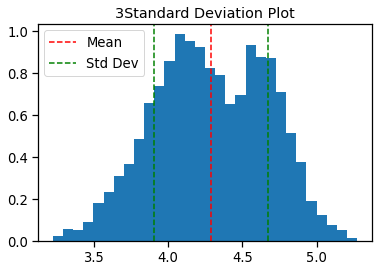

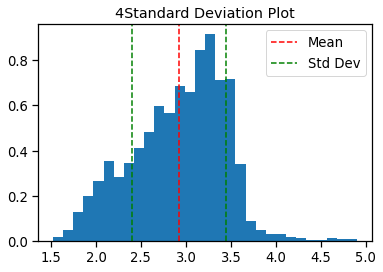

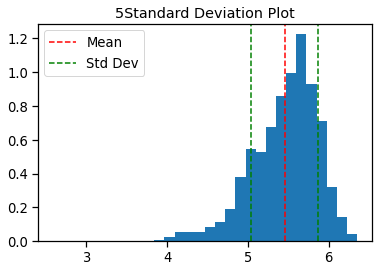

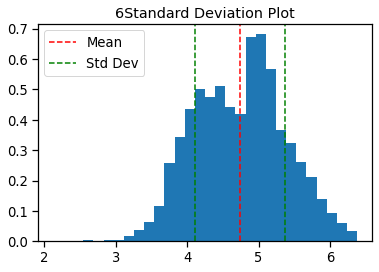

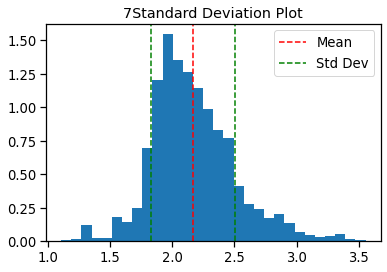

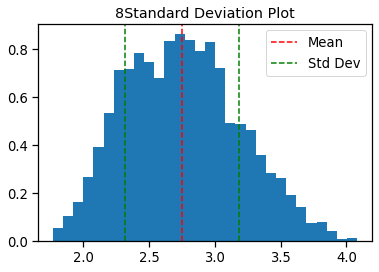

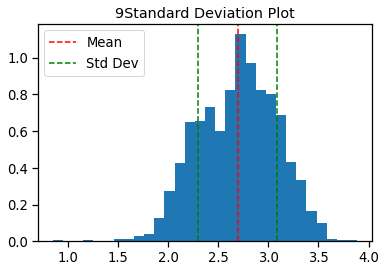

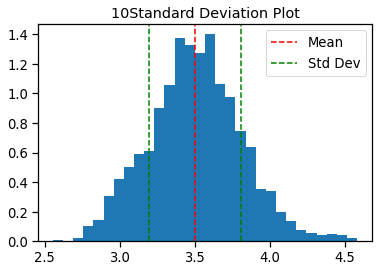

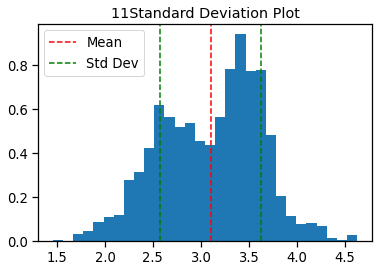

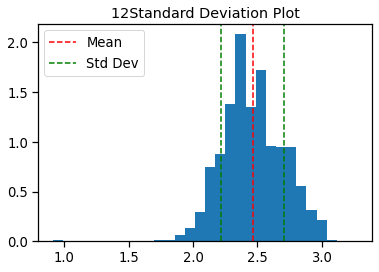

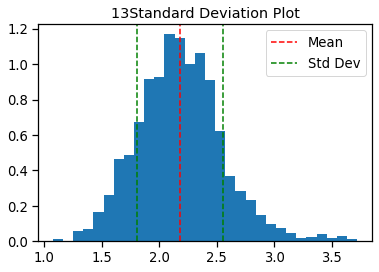

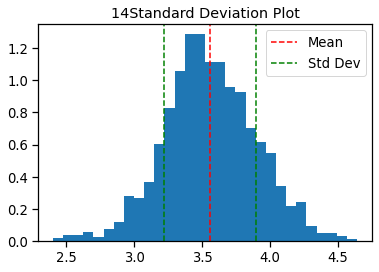

In [314]:
import numpy as np
import matplotlib.pyplot as plt
means = []
std_devs = []
mins = []
maxs = []
for jmp in ([3,4,5,6,7,8,9,10,11,12,13,14]):
    # Create some sample data
    data = np.asarray(participants[jmp])

    # Calculate the mean and standard deviation of the data
    means.append(np.nanmean(data))
    std_devs.append(np.nanstd(data))
    mins.append(np.nanmin(data))
    maxs.append(np.nanmax(data))
    
    mean = np.nanmean(data)
    std_dev = np.nanstd(data)

    # Create a histogram of the data
    fig, ax = plt.subplots()
    ax.hist(data, bins=30, density=True)

    # Add vertical lines for the mean and standard deviation
    ax.axvline(mean, color='red', linestyle='--', label='Mean')
    ax.axvline(mean+std_dev, color='green', linestyle='--', label='Std Dev')
    ax.axvline(mean-std_dev, color='green', linestyle='--')

    # Add a legend and title
    ax.legend()
    ax.set_title(str(jmp)+'Standard Deviation Plot')

    # Show the plot
    plt.show()

In [370]:
from scipy.stats import ks_2samp
from scipy.stats import normaltest

data = np.asarray(participants[8])
data = data[~np.isnan(data)]

# Test if the data is normally distributed
statistic, p_value = normaltest(data)
#arr = [1,2,3,4,5,11,1,1,1,1,1,1,1]
#statistic, p_value = normaltest(participants[7])
print(p_value)

0.0


In [379]:
from sklearn.neighbors import LocalOutlierFactor
import numpy as np

# Generate some random data
data = np.asarray(participants[3])
data = data[~np.isnan(data)]

# Fit the LOF model to the data and predict outlier scores
lof = LocalOutlierFactor(n_neighbors=1, contamination=0.4)
outlier_scores = lof.fit_predict(data.reshape(-1, 1))

# Identify outliers with outlier score < -1
outliers = data[outlier_scores < -1]

print("Number of outliers:", len(outliers))

Number of outliers: 0


In [398]:
data = np.zeros((12,max_length))
jmp = 0
arr = [3,4,5,6,7,8,9,10,11,12,13,14]
for i in range(12):
    data[i] = participants[arr[jmp]]
    jmp= jmp+1

In [400]:
data

array([[4.39061703, 4.39083151, 4.39104486, ...,        nan,        nan,
               nan],
       [3.54180335, 3.54216894, 3.54253842, ...,        nan,        nan,
               nan],
       [5.63175996, 5.63259809, 5.63343148, ...,        nan,        nan,
               nan],
       ...,
       [2.59365186, 2.5928013 , 2.5919527 , ...,        nan,        nan,
               nan],
       [1.97836499, 1.97667872, 1.97497766, ...,        nan,        nan,
               nan],
       [3.63058428, 3.62976689, 3.62895243, ...,        nan,        nan,
               nan]])

In [411]:
import numpy as np
from scipy.stats import gaussian_kde
# Calculate the mean diameter for each observation

mean_diameters = np.nanmean(data, axis=1)

#Calculate the density of values within +-1 mm of the mean for each observation
densities = []
for i in range(len(mean_diameters)):
   mask = (data[i] >= mean_diameters[i] - 1) & (data[i] <= mean_diameters[i] + 1)
   density = gaussian_kde(data[i][mask]).integrate_box_1d(mean_diameters[i]-1, mean_diameters[i]+1)
   densities.append(density)

#Select the 10 observations with the highest density values
top10 = np.argsort(densities)[-10:]

#Print the mean diameter and density values for the top 10 observations
for i in top10:
   print(f"Observation {i+1}: Mean diameter = {mean_diameters[i]:.2f}, Density = {densities[i]:.2f}")

Observation 2: Mean diameter = 2.92, Density = 1.00
Observation 6: Mean diameter = 2.75, Density = 1.00
Observation 12: Mean diameter = 3.56, Density = 1.00
Observation 1: Mean diameter = 4.29, Density = 1.00
Observation 3: Mean diameter = 5.45, Density = 1.00
Observation 7: Mean diameter = 2.69, Density = 1.00
Observation 5: Mean diameter = 2.17, Density = 1.00
Observation 11: Mean diameter = 2.18, Density = 1.00
Observation 8: Mean diameter = 3.50, Density = 1.00
Observation 10: Mean diameter = 2.46, Density = 1.00


In [413]:
[3,4,5,6,7,8,9,10,11,12,13,14]
ele = [4,8,14,3,5,9,7,13,10,12]
ele.sort()
print(ele)

[3, 4, 5, 7, 8, 9, 10, 12, 13, 14]


In [409]:
len(mean_diameters)

539572

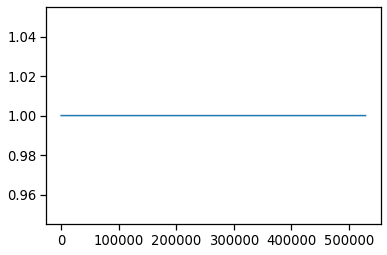

In [380]:
plt.plot(outlier_scores)

<ErrorbarContainer object of 3 artists>

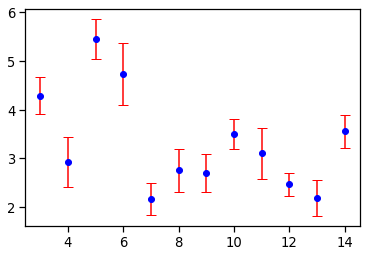

In [309]:
a = [3,4,5,6,7,8,9,10,11,12,13,14]
plt.errorbar(a, means, yerr=std_devs, fmt='o', color='blue', ecolor='red', capsize=5)

In [303]:
diff = np.asarray(maxs)-np.asarray(mins)

In [305]:
std_dev

[0.38218032314953126,
 0.5196201941169761,
 0.4144527729248628,
 0.6341700545037869,
 0.33727621863559354,
 0.4350964171222145,
 0.39315804278907157,
 0.3089672018758463,
 0.5263354012301728,
 0.2438829178227968,
 0.3734951910632097,
 0.3402987882491636]

In [229]:
percsmain[8][2]

[0.09943014344664963,
 0.11616589081675836,
 0.1226653205451792,
 0.11191732629727352,
 0.14377731769036117,
 0.21160651096956828,
 0.13143631436314362,
 0.15752864157119476,
 0.22264458322020092,
 0.11117693522906794,
 0.14023270055113288,
 0.1848604151753758,
 0.07821361058601134,
 0.13189897100093545,
 0.1727363184079602,
 0.1816,
 0.13456090651558072,
 0.1367741935483871,
 0.12445414847161572,
 0.2285842093491389,
 0.11458782908933966,
 0.14317092651757188,
 0.1864277544796035,
 0.13929475939996103,
 0.10918623204923639,
 0.1269239876864788,
 0.14936135146271118,
 0.1484966250767028,
 0.07955056179775281,
 0.08516988062442608,
 0.1656891495601173,
 0.09892848243209569,
 0.09236426562837984,
 0.19176319176319176,
 0.19533646962569032,
 0.1470144427678379,
 0.1311679091231807,
 0.07908335205571781,
 0.14420946626384692,
 0.10033030553261767,
 0.25028861694758714,
 0.2018348623853211,
 0.24665243547448087,
 0.14756871035940802,
 0.2242302543507363,
 0.16234543278819305,
 0.17792615868

In [78]:
(str(j)+'-'+str(k)+'-'+str(i))

'14-5-10'

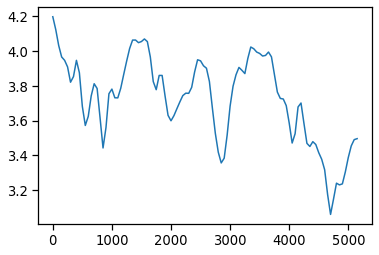

In [234]:
plt.plot(samples.diameter_3d[::50])

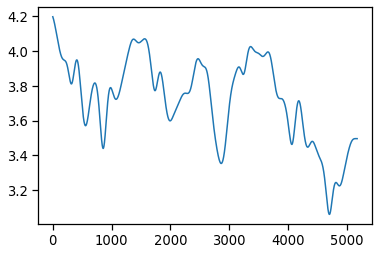

In [236]:
plt.plot(samples.diameter_3d[::])

In [235]:
len(samples.diameter_3d[::50])

104

In [35]:

x = samples.diameter_3d

In [40]:
samples.diameter_3d

pupil_timestamp
848.132557    2.122987
848.137564    2.122671
848.142570    2.122348
848.147577    2.122018
848.152583    2.121682
                ...   
871.367854    1.912073
871.372860    1.912085
871.377867    1.912095
871.382873    1.912103
871.387880    1.912109
Name: diameter_3d, Length: 4644, dtype: float64

In [180]:
path = '/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0073/' + '00'+str(6)
samples = extract_timeseries(path)
#plt.plot(samples.diameter_3d)

************************************************************
*************************** 006 ****************************
************************************************************
Loaded 4549 samples
1 blinks detected by Pupil Labs (mean dur = 20.552 s)


In [182]:
samples.to_csv('checking.csv')



0       3.714207
1       3.714703
2       3.715208
3       3.715723
4       3.716246
          ...   
4860    3.204931
4861    3.204942
4862    3.204952
4863    3.204960
4864    3.204966
Name: diameter_3d, Length: 4865, dtype: float64

In [310]:
def extract_timeseries(path):
        # Some useful constants
    SAMPLE_RATE = 200
    #DURATION = 1500
    #ONSET_IDX = 1
    # Columns to load
    use_cols = ['confidence',
                'method',
                'pupil_timestamp',
                'eye_id',
                'diameter_3d',
                'diameter']
    # Pupil Labs recording directories / exports
    subjects = {
        '001': [path, '000']
    }
    # Empty DataFrame to store processed PIPR data
    df = pd.DataFrame()

    # Loop over subjects
    for k in subjects.keys():
        # Get a handle on a subject
        rec = subjects[k][0]
        export = subjects[k][1]
        s = utils.new_subject(
            rec, export=export, out_dir_nm='pyplr_analysis')

        # Load pupil data
        samples = utils.load_pupil(
            s['data_dir'], eye_id='best', method='3d', cols=use_cols)

        # Pupil columns to analyse
        pupil_cols = ['diameter_3d', 'diameter']
        try:
            blinks  = utils.load_blinks(s['data_dir'])
        except:
            continue
    samples = preproc.mask_pupil_first_derivative(samples, threshold=4.0, mask_cols=pupil_cols)
    try:
        samples = preproc.mask_blinks(samples, blinks, mask_cols=['diameter_3d'])
    except:
        print('no blinks')

                    #Mask Pupil Confidence
    samples = preproc.mask_pupil_confidence(samples, threshold=0.75, mask_cols=pupil_cols)
    

                    #Low Pass Filter the Samples at a 1 Hz Cut off
                    #try:
                        #Interpolate Samples 
    samples = preproc.interpolate_pupil(samples, method='nearest', order=2,interp_cols=pupil_cols)
    samples = preproc.butterworth_series(samples, fields=pupil_cols, filt_order=3,cutoff_freq=1/(200/2))
    return samples
        



In [161]:
np.size(np.asarray(samples.diameter_3d))

4865

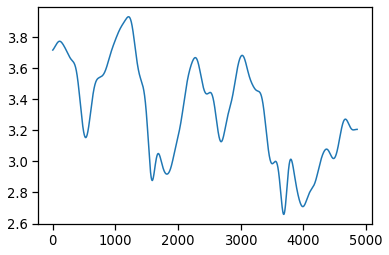

In [7]:
plt.plot(np.asarray(samples.diameter_3d))
#plt.plot(y)

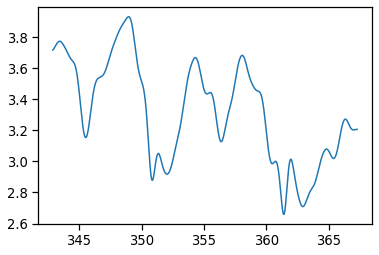

In [157]:
plt.plot(samples.diameter_3d)
#plt.plot(y)

In [171]:
ax = np.where(dy>0,1,0)
y = np.convolve(ax,[1,-1])


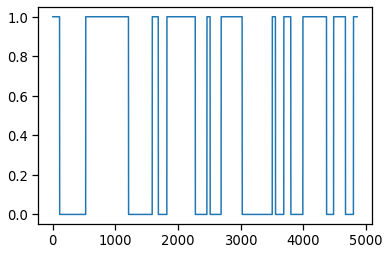

In [172]:
plt.plot(ax)

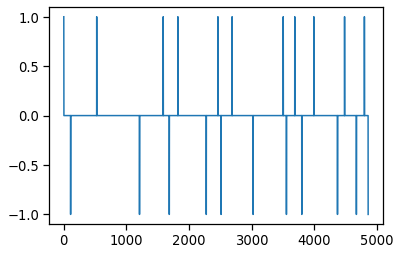

In [173]:
plt.plot(y)

In [5]:
events = utils.load_annotations(s['data_dir'])
events

Loaded 7 events


,index,label,duration
timestamp,,,
343.055592,5,start_of_experiment,0.0
343.306997,12,Ready_Tone,0.0
348.552366,169,Reference_tone,0.0
352.553612,288,comparison_tone,0.0
356.553415,408,Answer_tone,0.0
357.811224,445,feedback_tone,0.0
367.057854,721,End_of_Trial,0.0


In [7]:
                events = utils.load_annotations(s['data_dir'])
                event_qeury = events.axes[0].tolist()
                event_qeury = [round(float(i), 2) for i in event_qeury]
                qeury = samples.axes[0].tolist()
                query = [round(float(i), 2) for i in qeury ]

Loaded 7 events


In [9]:
samples.iloc[0:query.index(event_qeury[1])+600,:].iloc[::50,:]['diameter_3d'].tolist()

[3.714206630114995,
 3.746541315489117,
 3.770163272485872,
 3.758522671991853,
 3.724873262755731,
 3.684175180337842,
 3.651117226726575,
 3.6215214894647745,
 3.5185902553055217,
 3.3289917825141577,
 3.1751902816782636,
 3.171707688708288,
 3.3018370376874873,
 3.447644854380242]

In [23]:
def pupil_extract(path,participant_no):
    count = 0
    experimentsrc_data =  json_reader('/Users/noelalben/github/pupil-pitch/Pupil-labs/compare_data.txt')
    participant_data= json_reader('/Users/noelalben/github/pupil-pitch/Pupil-labs/DATA.txt')
    frequencies = ['820','826','832','838','844','850','856','862','868','874','880']
    block_keys = ['block_1', 'block_2', 'block_3', 'block_4', 'block_5']
    user_dictionary = {}
    for i in frequencies:
        user_dictionary[i] = {}
        for j in block_keys:
            user_dictionary[i][j] = {}
            user_dictionary[i][j]['time_stamps']=[]
            user_dictionary[i][j]['event_stamps']=[]
            user_dictionary[i][j]['first_set']=[]
            user_dictionary[i][j]['second_set']=[]
            user_dictionary[i][j]['first_set_timestamps']=[]
            user_dictionary[i][j]['second_set_timestamps']=[]
            user_dictionary[i][j]['setup_to_next_trial'] = []
    trial_keys = ['trial_1', 'trial_2', 'trial_3', 'trial_4', 'trial_5']
    # Some useful constants
    SAMPLE_RATE = 200
    #DURATION = 1500
    #ONSET_IDX = 1
    # Columns to load
    use_cols = ['confidence',
            'method',
            'pupil_timestamp',
            'eye_id',
            'diameter_3d',
            'diameter']
    participant_info = experimentsrc_data[str(participant_no)]
    for block in range(1,6):
        block_folder = str(participant_no)+str(block)
        if(participant_no >= 10):
                block_folder = '0'+str(participant_no)+str(block)
                print(block_folder)
                flag = True
        else:
            flag = False
        freqs = []
        for trial_number in range(0,11):
            freq = participant_info[trial_keys[block-1]]['Stimuli'][trial_number][6:9]
            freqs.append(freq)
            print(freqs)
            user_block = user_dictionary[freq][block_keys[block-1]]
            
            #print(user_block)
            trial_folder = '00'+str(trial_number)
            if(trial_number == 10):
                trial_folder = '010'
            directory = path+'/00'+block_folder+'/'+trial_folder
            if(flag==True):
                directory = path+'/'+block_folder+'/'+trial_folder
            print(directory)
            # Pupil Labs recording directories / exports
            subjects = {
            '001': [directory, '000']
            }
            df = pd.DataFrame()

            # Loop over subjects
            for k in subjects.keys():
                # Get a handle on a subject
                rec = subjects[k][0]
                export = subjects[k][1]
                s = utils.new_subject(
                    rec, export=export, out_dir_nm='pyplr_analysis')

                # Load pupil data
                samples = utils.load_pupil(
                    s['data_dir'], eye_id='best', method='3d', cols=use_cols)
                blinks  = utils.load_blinks(s['data_dir'])

                # Pupil columns to analyse
                pupil_cols = ['diameter_3d', 'diameter']

                #First Derivative
                samples = preproc.mask_pupil_first_derivative(samples, threshold=3.0, mask_cols=pupil_cols)
                
                try:
                    #Mask Blinks 
                    samples = preproc.mask_blinks(samples, blinks, mask_cols=['diameter_3d'])

                    #Mask Pupil Confidence
                    samples = preproc.mask_pupil_confidence(samples, threshold=0.75, mask_cols=pupil_cols)


                    #Low Pass Filter the Samples at a 1 Hz Cut off
                    #try:
                        #Interpolate Samples 

                    samples = preproc.interpolate_pupil(samples, method='nearest', order=2,interp_cols=pupil_cols)
                    samplestmp = samples
                    samples1 = preproc.butterworth_series(samplestmp, fields=pupil_cols, filt_order=3,cutoff_freq=1/(200/2))
                    if (samples1['diameter_3d'].isnull().all() == True):
                        samples = samples
                    else:
                        samples = samples1
                   # except samples['diameter_3d'].isnull().all() == True:
                except Exception:
                                        #Mask Pupil Confidence
                    samples = preproc.mask_pupil_confidence(samples, threshold=0.75, mask_cols=pupil_cols)


                    #Low Pass Filter the Samples at a 1 Hz Cut off
                    #try:
                        #Interpolate Samples 

                    samples = preproc.interpolate_pupil(samples, method='nearest', order=2,interp_cols=pupil_cols)
                    samplestmp = samples
                    samples1 = preproc.butterworth_series(samplestmp, fields=pupil_cols, filt_order=3,cutoff_freq=1/(200/2))
                    if (samples1['diameter_3d'].isnull().all() == True):
                        samples = samples
                    else:
                        samples = samples1
                   # except samples['diameter_3d'].isnull().all() == True:
                    
                    
                    

                events = utils.load_annotations(s['data_dir'])
                event_qeury = events.axes[0].tolist()
                event_qeury = [round(float(i), 2) for i in event_qeury]
                qeury = samples.axes[0].tolist()
                query = [round(float(i), 2) for i in qeury ]
                user_block['time_stamps'] = query
                user_block['event_stamps'] = event_qeury
                
                interpolation = np.size(np.where(samples['interpolated']==1)[0])
                all_values =  np.size(samples['interpolated'])
                percs = interpolation/all_values
                if(percs>0.8):
                    user_block['first_set'] = 'Reject'
                    user_block['second_set'] = 'Reject'
                    count = count+1
                    print('------here--------')
                    continue

                #Plotting the samples for participant
                #First two Events 
                try:
                    samples_extract = samples.iloc[query.index(event_qeury[0]):query.index(event_qeury[1])+600,:].iloc[::50,:].axes[0].tolist()
                    user_block['first_set_timestamps'] = samples_extract
                    user_block['untilevent0'] =samples.iloc[0:query.index(event_qeury[0]),:]['diameter_3d'].tolist()
                    user_block['first_set'] = samples.iloc[query.index(event_qeury[0]):query.index(event_qeury[1])+600,:].iloc[::50,:]['diameter_3d'].tolist()
                    if trial_number>0:
                        print(trial_number)
                        user_block_prev = user_dictionary[freqs[trial_number-1]][block_keys[block-1]]
                        setup = user_block_prev['setup_to_next_trial']
                        if(user_block_prev['first_set'] != 'Reject'):
                            setup = setup[len(setup) - 1::-1][0:12]
                            setup = setup[len(setup) - 1::-1]
                            user_block['first_set'][:0] = setup[0:12]

               # Second set of Events
                    samples_extract2 = samples.iloc[query.index(event_qeury[2]):query.index(event_qeury[4])+800,:].iloc[::50,:].axes[0].tolist()
                    user_block['second_set_timestamps']=samples_extract2
                    
                    user_block['second_set'] = samples.iloc[query.index(event_qeury[2]):query.index(event_qeury[4])+800,:].iloc[::50,:]['diameter_3d'].tolist()
             # Anticipation of new block
                    samples_extract3 = samples.iloc[query.index(event_qeury[4])+200:,:].iloc[::50,:]['diameter_3d'].tolist()
                    user_block['setup_to_next_trial'] = samples_extract3
                    
                except Exception:
                    continue
                
    json_writer(user_dictionary,participant_no)
    
    return user_dictionary

In [1]:
hel = [1]
hel[-1]

1

In [158]:
path = '/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording'
dic_5 = pupil_extract(path,6)

['862']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0061/000
************************************************************
*************************** 000 ****************************
************************************************************
Loaded 4942 samples
3 blinks detected by Pupil Labs (mean dur = 0.320 s)
Loaded 7 events
['862', '874']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0061/001
************************************************************
*************************** 001 ****************************
************************************************************
Loaded 4506 samples
1 blinks detected by Pupil Labs (mean dur = 13.227 s)
Loaded 7 events
1
['862', '874', '820']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0061/002
************************************************************
*************************** 002 ****************************
************************************************************
Loaded 4325 samples
1 blinks detecte

Loaded 5041 samples
[Errno 2] No such file or directory: '/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0063/001/exports/000/blinks.csv'
Loaded 7 events
1
['826', '868', '874']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0063/002
************************************************************
*************************** 002 ****************************
************************************************************
Loaded 4477 samples
1 blinks detected by Pupil Labs (mean dur = 0.481 s)
Loaded 7 events
2
['826', '868', '874', '844']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0063/003
************************************************************
*************************** 003 ****************************
************************************************************
Loaded 4031 samples
[Errno 2] No such file or directory: '/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0063/003/exports/000/blinks.csv'
Loaded 7 events
3
['826', '868', '874', '844', '850']
/Use

Loaded 7 events
['850', '844']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0065/001
************************************************************
*************************** 001 ****************************
************************************************************
Loaded 4282 samples
[Errno 2] No such file or directory: '/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0065/001/exports/000/blinks.csv'
Loaded 7 events
1
['850', '844', '868']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0065/002
************************************************************
*************************** 002 ****************************
************************************************************
Loaded 5672 samples
2 blinks detected by Pupil Labs (mean dur = 0.368 s)
Loaded 7 events
2
['850', '844', '868', '832']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0065/003
************************************************************
*************************** 003 ****************

In [159]:
block_keys = ['block_1', 'block_2', 'block_3', 'block_4', 'block_5']
frequencies = ['820','826','832','838','844','850','856','862','868','874','880']
for i in block_keys:
    for j in frequencies:
        if(len(dic_5[j][i]['first_set'])<20):
            print(len(dic_5[j][i]['first_set']))


14
13
13
13
13


In [166]:
block_keys = ['block_1', 'block_2', 'block_3', 'block_4', 'block_5']
frequencies = ['820','826','832','838','844','850','856','862','868','874','880']
for i in block_keys:
    for j in frequencies:
        print(len(dics[4][j][i]['first_set']))

25
25
25
25
13
25
25
25
25
25
25
25
25
25
25
26
25
25
25
25
13
25
25
25
13
25
6
25
14
25
25
25
25
25
26
25
25
13
25
25
25
26
13
25
25
25
25
26
25
13
25
25
25
25
25


In [31]:
path = '/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording'
dics = []
for i in range(3,15):
    dics.append(pupil_extract(path,i))

['880']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0031/000
************************************************************
*************************** 000 ****************************
************************************************************
Loaded 4861 samples
[Errno 2] No such file or directory: '/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0031/000/exports/000/blinks.csv'
Loaded 7 events
['880', '868']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0031/001
************************************************************
*************************** 001 ****************************
************************************************************
Loaded 3672 samples
[Errno 2] No such file or directory: '/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0031/001/exports/000/blinks.csv'
Loaded 7 events
1
['880', '868', '856']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0031/002
************************************************************
***************

Loaded 4797 samples
[Errno 2] No such file or directory: '/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0032/008/exports/000/blinks.csv'
Loaded 7 events
8
['868', '874', '880', '850', '832', '820', '856', '838', '826', '844']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0032/009
************************************************************
*************************** 009 ****************************
************************************************************
Loaded 5187 samples
[Errno 2] No such file or directory: '/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0032/009/exports/000/blinks.csv'
Loaded 7 events
9
['868', '874', '880', '850', '832', '820', '856', '838', '826', '844', '862']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0032/010
************************************************************
*************************** 010 ****************************
************************************************************
Loaded 5459 samples
[Errno 2] No 

Loaded 5006 samples
1 blinks detected by Pupil Labs (mean dur = 0.155 s)
Loaded 7 events
7
['868', '826', '856', '832', '880', '820', '862', '838', '874']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0034/008
************************************************************
*************************** 008 ****************************
************************************************************
Loaded 5143 samples
[Errno 2] No such file or directory: '/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0034/008/exports/000/blinks.csv'
Loaded 7 events
8
['868', '826', '856', '832', '880', '820', '862', '838', '874', '850']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0034/009
************************************************************
*************************** 009 ****************************
************************************************************
Loaded 4569 samples
[Errno 2] No such file or directory: '/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0034/00

4 blinks detected by Pupil Labs (mean dur = 0.407 s)
Loaded 7 events
6
['850', '838', '832', '826', '880', '820', '862', '856']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0041/007
************************************************************
*************************** 007 ****************************
************************************************************
Loaded 4489 samples
1 blinks detected by Pupil Labs (mean dur = 0.201 s)
Loaded 7 events
7
['850', '838', '832', '826', '880', '820', '862', '856', '874']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0041/008
************************************************************
*************************** 008 ****************************
************************************************************
Loaded 4744 samples
3 blinks detected by Pupil Labs (mean dur = 2.413 s)
Loaded 7 events
8
['850', '838', '832', '826', '880', '820', '862', '856', '874', '868']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0041/009


Loaded 5054 samples
2 blinks detected by Pupil Labs (mean dur = 0.199 s)
Loaded 7 events
8
['844', '856', '832', '874', '826', '838', '820', '850', '880', '868']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0043/009
************************************************************
*************************** 009 ****************************
************************************************************
Loaded 4997 samples
2 blinks detected by Pupil Labs (mean dur = 0.218 s)
Loaded 7 events
9
['844', '856', '832', '874', '826', '838', '820', '850', '880', '868', '862']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0043/010
************************************************************
*************************** 010 ****************************
************************************************************
Loaded 4393 samples
4 blinks detected by Pupil Labs (mean dur = 0.294 s)
Loaded 7 events
10
['838']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0044/000
**************

Loaded 5050 samples
3 blinks detected by Pupil Labs (mean dur = 0.174 s)
Loaded 7 events
10
['868']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0051/000
************************************************************
*************************** 000 ****************************
************************************************************
Loaded 3872 samples
[Errno 2] No such file or directory: '/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0051/000/exports/000/blinks.csv'
Loaded 7 events
['868', '826']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0051/001
************************************************************
*************************** 001 ****************************
************************************************************
Loaded 3880 samples
[Errno 2] No such file or directory: '/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0051/001/exports/000/blinks.csv'
Loaded 7 events
1
['868', '826', '820']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRec

Loaded 4360 samples
[Errno 2] No such file or directory: '/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0052/010/exports/000/blinks.csv'
Loaded 7 events
10
['862']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0053/000
************************************************************
*************************** 000 ****************************
************************************************************
Loaded 4579 samples
1 blinks detected by Pupil Labs (mean dur = 0.215 s)
Loaded 7 events
['862', '838']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0053/001
************************************************************
*************************** 001 ****************************
************************************************************
Loaded 4964 samples
2 blinks detected by Pupil Labs (mean dur = 4.844 s)
Loaded 7 events
1
['862', '838', '844']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0053/002
********************************************************

Loaded 7 events
9
['868', '838', '874', '844', '820', '832', '850', '826', '856', '862', '880']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0054/010
************************************************************
*************************** 010 ****************************
************************************************************
Loaded 4751 samples
3 blinks detected by Pupil Labs (mean dur = 0.225 s)
Loaded 7 events
10
['838']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0055/000
************************************************************
*************************** 000 ****************************
************************************************************
Loaded 4340 samples
1 blinks detected by Pupil Labs (mean dur = 0.165 s)
Loaded 7 events
['838', '880']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0055/001
************************************************************
*************************** 001 ****************************
***********************

Loaded 4761 samples
[Errno 2] No such file or directory: '/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0061/008/exports/000/blinks.csv'
Loaded 7 events
8
['862', '874', '820', '844', '880', '832', '826', '868', '856', '838']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0061/009
************************************************************
*************************** 009 ****************************
************************************************************
Loaded 3570 samples
1 blinks detected by Pupil Labs (mean dur = 0.471 s)
Loaded 7 events
9
['862', '874', '820', '844', '880', '832', '826', '868', '856', '838', '850']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0061/010
************************************************************
*************************** 010 ****************************
************************************************************
Loaded 4558 samples
2 blinks detected by Pupil Labs (mean dur = 0.574 s)
Loaded 7 events
10
['820']
/User

Loaded 11266 samples
[Errno 2] No such file or directory: '/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0063/006/exports/000/blinks.csv'
Loaded 7 events
6
['826', '868', '874', '844', '850', '820', '862', '838']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0063/007
************************************************************
*************************** 007 ****************************
************************************************************
Loaded 4863 samples
1 blinks detected by Pupil Labs (mean dur = 0.166 s)
Loaded 7 events
7
['826', '868', '874', '844', '850', '820', '862', '838', '856']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0063/008
************************************************************
*************************** 008 ****************************
************************************************************
Loaded 4866 samples
1 blinks detected by Pupil Labs (mean dur = 0.170 s)
Loaded 7 events
8
['826', '868', '874', '844', '850', '820'

Loaded 4835 samples
2 blinks detected by Pupil Labs (mean dur = 1.029 s)
Loaded 7 events
6
['850', '844', '868', '832', '880', '856', '826', '874']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0065/007
************************************************************
*************************** 007 ****************************
************************************************************
Loaded 4036 samples
[Errno 2] No such file or directory: '/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0065/007/exports/000/blinks.csv'
Loaded 7 events
7
['850', '844', '868', '832', '880', '856', '826', '874', '820']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0065/008
************************************************************
*************************** 008 ****************************
************************************************************
Loaded 5261 samples
[Errno 2] No such file or directory: '/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0065/008/exports/000/

Loaded 4924 samples
1 blinks detected by Pupil Labs (mean dur = 0.190 s)
Loaded 7 events
6
['874', '844', '880', '868', '856', '826', '862', '850']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0072/007
************************************************************
*************************** 007 ****************************
************************************************************
Loaded 4656 samples
[Errno 2] No such file or directory: '/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0072/007/exports/000/blinks.csv'
Loaded 7 events
7
['874', '844', '880', '868', '856', '826', '862', '850', '820']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0072/008
************************************************************
*************************** 008 ****************************
************************************************************
Loaded 4382 samples
1 blinks detected by Pupil Labs (mean dur = 13.518 s)
Loaded 7 events
8
['874', '844', '880', '868', '856', '826'

Loaded 4533 samples
1 blinks detected by Pupil Labs (mean dur = 0.190 s)
Loaded 7 events
5
['844', '880', '850', '832', '874', '856', '826']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0074/006
************************************************************
*************************** 006 ****************************
************************************************************
Loaded 4756 samples
1 blinks detected by Pupil Labs (mean dur = 0.167 s)
Loaded 7 events
6
['844', '880', '850', '832', '874', '856', '826', '820']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0074/007
************************************************************
*************************** 007 ****************************
************************************************************
Loaded 5402 samples
1 blinks detected by Pupil Labs (mean dur = 10.005 s)
Loaded 7 events
7
['844', '880', '850', '832', '874', '856', '826', '820', '862']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0074/008


Loaded 4182 samples
3 blinks detected by Pupil Labs (mean dur = 0.281 s)
Loaded 7 events
8
['850', '856', '820', '868', '826', '832', '838', '880', '844', '874']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0081/009
************************************************************
*************************** 009 ****************************
************************************************************
Loaded 5020 samples
3 blinks detected by Pupil Labs (mean dur = 0.327 s)
Loaded 7 events
9
['850', '856', '820', '868', '826', '832', '838', '880', '844', '874', '862']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0081/010
************************************************************
*************************** 010 ****************************
************************************************************
Loaded 4197 samples
2 blinks detected by Pupil Labs (mean dur = 0.370 s)
Loaded 7 events
10
['868']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0082/000
**************

Loaded 5234 samples
4 blinks detected by Pupil Labs (mean dur = 0.283 s)
Loaded 7 events
10
['844']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0084/000
************************************************************
*************************** 000 ****************************
************************************************************
Loaded 4799 samples
2 blinks detected by Pupil Labs (mean dur = 0.213 s)
Loaded 7 events
['844', '856']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0084/001
************************************************************
*************************** 001 ****************************
************************************************************
Loaded 4866 samples
2 blinks detected by Pupil Labs (mean dur = 0.288 s)
Loaded 7 events
1
['844', '856', '862']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0084/002
************************************************************
*************************** 002 ****************************
******

Loaded 4136 samples
18 blinks detected by Pupil Labs (mean dur = 0.297 s)
Loaded 7 events
['844', '862']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0091/001
************************************************************
*************************** 001 ****************************
************************************************************
Loaded 4214 samples
22 blinks detected by Pupil Labs (mean dur = 0.295 s)
Loaded 7 events
1
['844', '862', '850']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0091/002
************************************************************
*************************** 002 ****************************
************************************************************
Loaded 4713 samples
19 blinks detected by Pupil Labs (mean dur = 0.192 s)
Loaded 7 events
2
['844', '862', '850', '826']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0091/003
************************************************************
*************************** 003 ************

Loaded 4987 samples
21 blinks detected by Pupil Labs (mean dur = 0.204 s)
Loaded 7 events
['880', '874']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0093/001
************************************************************
*************************** 001 ****************************
************************************************************
Loaded 4591 samples
19 blinks detected by Pupil Labs (mean dur = 0.322 s)
Loaded 7 events
1
['880', '874', '820']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0093/002
************************************************************
*************************** 002 ****************************
************************************************************
Loaded 4753 samples
17 blinks detected by Pupil Labs (mean dur = 0.396 s)
Loaded 7 events
2
['880', '874', '820', '856']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0093/003
************************************************************
*************************** 003 ************

Loaded 5033 samples
22 blinks detected by Pupil Labs (mean dur = 0.216 s)
Loaded 7 events
2
['844', '838', '874', '880']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0095/003
************************************************************
*************************** 003 ****************************
************************************************************
Loaded 5088 samples
26 blinks detected by Pupil Labs (mean dur = 0.329 s)
Loaded 7 events
3
['844', '838', '874', '880', '832']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0095/004
************************************************************
*************************** 004 ****************************
************************************************************
Loaded 4456 samples
16 blinks detected by Pupil Labs (mean dur = 0.359 s)
Loaded 7 events
4
['844', '838', '874', '880', '832', '856']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0095/005
************************************************************


Loaded 5396 samples
10 blinks detected by Pupil Labs (mean dur = 0.149 s)
Loaded 7 events
2
['862', '856', '838', '832']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0102/003
************************************************************
*************************** 003 ****************************
************************************************************
Loaded 4565 samples
8 blinks detected by Pupil Labs (mean dur = 0.819 s)
Loaded 7 events
3
['862', '856', '838', '832', '826']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0102/004
************************************************************
*************************** 004 ****************************
************************************************************
Loaded 5012 samples
7 blinks detected by Pupil Labs (mean dur = 0.861 s)
Loaded 7 events
4
['862', '856', '838', '832', '826', '880']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0102/005
************************************************************
**

Loaded 7 events
2
['826', '856', '850', '844']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0104/003
************************************************************
*************************** 003 ****************************
************************************************************
Loaded 4311 samples
3 blinks detected by Pupil Labs (mean dur = 4.093 s)
Loaded 7 events
3
['826', '856', '850', '844', '832']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0104/004
************************************************************
*************************** 004 ****************************
************************************************************
Loaded 4037 samples
1 blinks detected by Pupil Labs (mean dur = 0.134 s)
Loaded 7 events
4
['826', '856', '850', '844', '832', '838']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0104/005
************************************************************
*************************** 005 ****************************
***************

Loaded 4548 samples
7 blinks detected by Pupil Labs (mean dur = 1.298 s)
Loaded 7 events
3
['880', '844', '820', '850', '856']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0111/004
************************************************************
*************************** 004 ****************************
************************************************************
Loaded 4347 samples
10 blinks detected by Pupil Labs (mean dur = 0.350 s)
Loaded 7 events
4
['880', '844', '820', '850', '856', '838']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0111/005
************************************************************
*************************** 005 ****************************
************************************************************
Loaded 4239 samples
15 blinks detected by Pupil Labs (mean dur = 0.319 s)
Loaded 7 events
5
['880', '844', '820', '850', '856', '838', '832']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0111/006
*****************************************

4
['868', '880', '838', '832', '856', '850']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0113/005
************************************************************
*************************** 005 ****************************
************************************************************
Loaded 4889 samples
8 blinks detected by Pupil Labs (mean dur = 1.177 s)
Loaded 7 events
5
['868', '880', '838', '832', '856', '850', '862']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0113/006
************************************************************
*************************** 006 ****************************
************************************************************
Loaded 4450 samples
3 blinks detected by Pupil Labs (mean dur = 4.531 s)
Loaded 7 events
6
['868', '880', '838', '832', '856', '850', '862', '820']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0113/007
************************************************************
*************************** 007 ******************

Loaded 4767 samples
12 blinks detected by Pupil Labs (mean dur = 0.950 s)
Loaded 7 events
4
['820', '844', '868', '850', '874', '832']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0115/005
************************************************************
*************************** 005 ****************************
************************************************************
Loaded 5609 samples
16 blinks detected by Pupil Labs (mean dur = 0.243 s)
Loaded 7 events
5
['820', '844', '868', '850', '874', '832', '826']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0115/006
************************************************************
*************************** 006 ****************************
************************************************************
Loaded 4892 samples
9 blinks detected by Pupil Labs (mean dur = 0.908 s)
Loaded 7 events
6
['820', '844', '868', '850', '874', '832', '826', '880']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0115/007
********************

Loaded 4465 samples
5 blinks detected by Pupil Labs (mean dur = 3.469 s)
Loaded 7 events
4
['832', '838', '862', '826', '874', '820']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0122/005
************************************************************
*************************** 005 ****************************
************************************************************
Loaded 4847 samples
5 blinks detected by Pupil Labs (mean dur = 3.039 s)
Loaded 7 events
5
['832', '838', '862', '826', '874', '820', '868']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0122/006
************************************************************
*************************** 006 ****************************
************************************************************
Loaded 4060 samples
1 blinks detected by Pupil Labs (mean dur = 17.633 s)
Loaded 7 events
------here--------
['832', '838', '862', '826', '874', '820', '868', '880']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0122/007
****

Loaded 4612 samples
6 blinks detected by Pupil Labs (mean dur = 2.545 s)
Loaded 7 events
5
['844', '868', '832', '826', '820', '838', '874']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0124/006
************************************************************
*************************** 006 ****************************
************************************************************
Loaded 4964 samples
8 blinks detected by Pupil Labs (mean dur = 1.829 s)
Loaded 7 events
6
['844', '868', '832', '826', '820', '838', '874', '850']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0124/007
************************************************************
*************************** 007 ****************************
************************************************************
Loaded 4744 samples
5 blinks detected by Pupil Labs (mean dur = 2.964 s)
Loaded 7 events
7
['844', '868', '832', '826', '820', '838', '874', '850', '880']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0124/008
*

Loaded 4922 samples
9 blinks detected by Pupil Labs (mean dur = 0.430 s)
Loaded 7 events
8
['880', '862', '856', '826', '850', '832', '820', '874', '838', '844']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0131/009
************************************************************
*************************** 009 ****************************
************************************************************
Loaded 3971 samples
5 blinks detected by Pupil Labs (mean dur = 0.861 s)
Loaded 7 events
9
['880', '862', '856', '826', '850', '832', '820', '874', '838', '844', '868']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0131/010
************************************************************
*************************** 010 ****************************
************************************************************
Loaded 4541 samples
6 blinks detected by Pupil Labs (mean dur = 0.940 s)
Loaded 7 events
10
0132
['844']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0132/000
*********

Loaded 5214 samples
4 blinks detected by Pupil Labs (mean dur = 5.030 s)
Loaded 7 events
9
['850', '826', '868', '856', '844', '874', '880', '862', '820', '832', '838']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0133/010
************************************************************
*************************** 010 ****************************
************************************************************
Loaded 4367 samples
6 blinks detected by Pupil Labs (mean dur = 1.811 s)
Loaded 7 events
10
0134
['880']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0134/000
************************************************************
*************************** 000 ****************************
************************************************************
Loaded 4767 samples
11 blinks detected by Pupil Labs (mean dur = 0.338 s)
Loaded 7 events
['880', '826']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0134/001
************************************************************
*****

0141
['856']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0141/000
************************************************************
*************************** 000 ****************************
************************************************************
Loaded 4161 samples
4 blinks detected by Pupil Labs (mean dur = 0.212 s)
Loaded 7 events
['856', '820']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0141/001
************************************************************
*************************** 001 ****************************
************************************************************
Loaded 4364 samples
6 blinks detected by Pupil Labs (mean dur = 0.224 s)
Loaded 7 events
1
['856', '820', '826']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0141/002
************************************************************
*************************** 002 ****************************
************************************************************
Loaded 3563 samples
2 blinks det

Loaded 5276 samples
8 blinks detected by Pupil Labs (mean dur = 0.530 s)
Loaded 7 events
1
['844', '862', '820']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0143/002
************************************************************
*************************** 002 ****************************
************************************************************
Loaded 5476 samples
10 blinks detected by Pupil Labs (mean dur = 0.978 s)
Loaded 7 events
2
['844', '862', '820', '826']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0143/003
************************************************************
*************************** 003 ****************************
************************************************************
Loaded 4027 samples
11 blinks detected by Pupil Labs (mean dur = 0.195 s)
Loaded 7 events
3
['844', '862', '820', '826', '880']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0143/004
************************************************************
**********************

Loaded 7 events
3
['820', '880', '868', '826', '832']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0145/004
************************************************************
*************************** 004 ****************************
************************************************************
Loaded 4582 samples
8 blinks detected by Pupil Labs (mean dur = 0.213 s)
Loaded 7 events
4
['820', '880', '868', '826', '832', '874']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0145/005
************************************************************
*************************** 005 ****************************
************************************************************
Loaded 4829 samples
8 blinks detected by Pupil Labs (mean dur = 0.668 s)
Loaded 7 events
5
['820', '880', '868', '826', '832', '874', '856']
/Users/noelalben/Desktop/Pupil-PitchData/EyeRecording/0145/006
************************************************************
*************************** 006 ***********************

In [150]:
dic_5['820'].keys()


dict_keys(['block_1', 'block_2', 'block_3', 'block_4', 'block_5'])

In [18]:
experimentsrc_data =  json_reader('/Users/noelalben/github/pupil-pitch/Pupil-labs/compare_data.txt')
block_keys = ['block_1', 'block_2', 'block_3', 'block_4', 'block_5']
trial_keys = ['trial_1', 'trial_2', 'trial_3', 'trial_4', 'trial_5']
participant_data= json_reader('/Users/noelalben/github/pupil-pitch/Pupil-labs/DATA.txt')

In [29]:
experimentsrc_data

{'1': {'trial_1': {'Stimuli': ['Audio/850.0.wav',
    'Audio/880.0.wav',
    'Audio/838.0.wav',
    'Audio/820.0.wav',
    'Audio/826.0.wav',
    'Audio/868.0.wav',
    'Audio/844.0.wav',
    'Audio/832.0.wav',
    'Audio/862.0.wav',
    'Audio/874.0.wav',
    'Audio/856.0.wav'],
   'Answers': ['rshift',
    'rshift',
    'lshift',
    'lshift',
    'lshift',
    'rshift',
    'lshift',
    'lshift',
    'rshift',
    'rshift',
    'rshift']},
  'trial_2': {'Stimuli': ['Audio/844.0.wav',
    'Audio/838.0.wav',
    'Audio/880.0.wav',
    'Audio/820.0.wav',
    'Audio/856.0.wav',
    'Audio/850.0.wav',
    'Audio/826.0.wav',
    'Audio/862.0.wav',
    'Audio/874.0.wav',
    'Audio/868.0.wav',
    'Audio/832.0.wav'],
   'Answers': ['lshift',
    'lshift',
    'rshift',
    'lshift',
    'rshift',
    'rshift',
    'lshift',
    'rshift',
    'rshift',
    'rshift',
    'lshift']},
  'trial_3': {'Stimuli': ['Audio/820.0.wav',
    'Audio/880.0.wav',
    'Audio/844.0.wav',
    'Audio/850.0.w

In [26]:
events.axes[0]

Float64Index([ 343.0555924839998, 343.30699712599994,  348.5523664740001,
              352.55361157599987,  356.5534147279998, 357.81122419200005,
                   367.057853651],
             dtype='float64', name='timestamp')

In [3]:
    experimentsrc_data =  json_reader('/Users/noelalben/github/pupil-pitch/Pupil-labs/compare_data.txt')
    participant_data= json_reader('/Users/noelalben/github/pupil-pitch/Pupil-labs/DATA.txt')

In [4]:
stim_order = {}
for parts in experimentsrc_data.keys():
    stim_order[parts]=[0,0,0,0,0,0,0,0,0,0,0]

In [9]:
json_writer(stim_order,'StimuliOrderMain')

In [7]:
Trials = ['trial_1','trial_2','trial_3']
frequencies = ['820','826','832','838','844','850','856','862','868','874','880']

In [8]:
for i in experimentsrc_data.keys():
    for j in Trials:
        stimarray = experimentsrc_data[i][j]['Stimuli']
        print(stimarray)
        print(i)
        
        for f in frequencies:
            if(len(stimarray))==0:
                break
            index = stimarray.index('Audio/'+f+'.0.wav')
            stim_order[i][index] = f

['Audio/850.0.wav', 'Audio/880.0.wav', 'Audio/838.0.wav', 'Audio/820.0.wav', 'Audio/826.0.wav', 'Audio/868.0.wav', 'Audio/844.0.wav', 'Audio/832.0.wav', 'Audio/862.0.wav', 'Audio/874.0.wav', 'Audio/856.0.wav']
1
['Audio/844.0.wav', 'Audio/838.0.wav', 'Audio/880.0.wav', 'Audio/820.0.wav', 'Audio/856.0.wav', 'Audio/850.0.wav', 'Audio/826.0.wav', 'Audio/862.0.wav', 'Audio/874.0.wav', 'Audio/868.0.wav', 'Audio/832.0.wav']
1
['Audio/820.0.wav', 'Audio/880.0.wav', 'Audio/844.0.wav', 'Audio/850.0.wav', 'Audio/826.0.wav', 'Audio/838.0.wav', 'Audio/832.0.wav', 'Audio/868.0.wav', 'Audio/874.0.wav', 'Audio/856.0.wav', 'Audio/862.0.wav']
1
['Audio/856.0.wav', 'Audio/868.0.wav', 'Audio/820.0.wav', 'Audio/850.0.wav', 'Audio/826.0.wav', 'Audio/838.0.wav', 'Audio/862.0.wav', 'Audio/844.0.wav', 'Audio/874.0.wav', 'Audio/832.0.wav', 'Audio/880.0.wav']
2
['Audio/850.0.wav', 'Audio/838.0.wav', 'Audio/820.0.wav', 'Audio/832.0.wav', 'Audio/826.0.wav', 'Audio/868.0.wav', 'Audio/844.0.wav', 'Audio/856.0.wav',

In [18]:
df_s = [df_820,df_826,df_832,df_838,df_844,df_850,df_856,df_862,df_868,df_874,df_880]
frequencies = ['820','826','832','838','844','850','856','862','868','874','880']

NameError: name 'df_820' is not defined

In [12]:
indexes = ['3_1','3_2','3_3','3_4','3_5','4_1','4_2','4_3','4_4','4_5','5_1','5_2','5_3','5_4','5_5','6_1','6_2','6_3','6_4','6_5','7_1','7_2','7_3','7_4','7_5','8_1','8_2','8_3','8_4','8_5','9_1','9_2','9_3','9_4','9_5','10_1','10_2','10_3','10_4','10_5','11_1','11_2','11_3','11_4','11_5','12_1','12_2','12_3','12_4','12_5','13_1','13_2','13_3','13_4','13_5','14_1','14_2','14_3','14_4','14_5']
frequencies = ['820','826','832','838','844','850','856','862','868','874','880']

In [16]:
def Answer_check(Comparison_Hz, Block_number,participantsrc_data,participant_respond_data):
    Trials = ['trial_1','trial_2','trial_3','trial_4','trial_5']
    comparison_flag = 'rshift'
    if (Comparison_Hz<850):
        comparison_flag = 'lshift'
    
    participant_data = participantsrc_data[Trials[Block_number-1]]
    participant_data_stimuli = np.asarray(participant_data['Stimuli'])
    checker = 'Audio/'+str(Comparison_Hz)+'.0.wav'
    print(checker)
    find = np.where(checker == participant_data_stimuli)[0]
    participant_response_data = participant_respond_data[Trials[Block_number-1]]
    print(participant_response_data)
    print(participant_data['Answers'])
    print(find)
    if(participant_response_data[0][find[0]] == participant_data['Answers'][find[0]]):
        Answer = 'Correct'
    elif (Comparison_Hz == 850):
        Answer = 'Correct'
    else:
        Answer = 'Incorrect'
    return Answer

In [14]:
df_list = [pd.DataFrame(columns=['Participant','Comparison Hertz','3s-pre-ready','2s-pre-ready','1s-pre-ready','0th-time','at-ready','1s-post-ready','2s-post-ready','at-standard','1s-post-standard','2s-post-standard','3s-post-standard','at-comparison','1s-post-comparison','2s-post-comp','3s-post-comp','at-response','1s-post-response','2s-post-response','3s-post-response','4s-post-response','Response (Correct/Incorrect)','Baseline'],index = indexes) for x in range(11)]

In [15]:
path = '/Users/noelalben/github/pupil-pitch/'

In [34]:
read_path = path + str(7)+'.json'
user_dictionary = json_reader(read_path)

In [35]:
k = 0
for df_iter in df_list:
    #df_iter = pd.DataFrame(columns=['Participant','Comparison Hertz','3s-pre-ready','2s-pre-ready','1s-pre-ready','at-ready','1s-post-ready','2s-post-ready','at-standard','1s-post-standard','2s-post-standard','3s-post-standard','at-comparison','1s-post-comparison','2s-post-comp','3s-post-comp','at-response','1s-post-response','2s-post-response','3s-post-response','4s-post-response','Response (Correct/Incorrect)'],index = indexes)
    path = '/Users/noelalben/github/pupil-pitch/'
    freq_in_check =int(frequencies[k])
    k = k+1
    for i in range(3,15):
        read_path = path + str(i)+'.json'
        user_dictionary = json_reader(read_path)
        for j in range(1,6):
            user_block_first_set = user_dictionary[str(freq_in_check)][block_keys[j-1]]['first_set']
            user_block_second_set = user_dictionary[str(freq_in_check)][block_keys[j-1]]['second_set']
            Answer = Answer_check(freq_in_check, j-1,experimentsrc_data[str(i)],participant_data[str(i)][str(i)]['Key_Responds'])
            try:
                user_block_begining = np.mean(user_dictionary[str(freq_in_check)][block_keys[j-1]]['untilevent0'][0:-10])
            except:
                user_block_begining = []
            participant_block = str(i)+'_'+str(j)
            print(participant_block)
            try:
                if(len(user_block_first_set)<20):
                    df_iter.loc[participant_block] = pd.Series({'Participant':i,'Comparison Hertz':freq_in_check,'0th-time': user_block_begining, 'at-ready':user_block_first_set[2],'1s-post-ready':user_block_first_set[6],'2s-post-ready':user_block_first_set[10],'at-standard':user_block_second_set[0],'1s-post-standard':user_block_second_set[4],'2s-post-standard':user_block_second_set[8],'3s-post-standard':user_block_second_set[12],'at-comparison':user_block_second_set[16],'1s-post-comparison':user_block_second_set[20],'2s-post-comp':user_block_second_set[24],'3s-post-comp':user_block_second_set[28],'at-response':user_block_second_set[32],'1s-post-response':user_block_second_set[36],'2s-post-response':user_block_second_set[40],'3s-post-response':user_block_second_set[44],'4s-post-response':user_block_second_set[47],'Response (Correct/Incorrect)':Answer,'Baseline':user_block_begining})
                else:   
                    df_iter.loc[participant_block] = pd.Series({'Participant':i,'Comparison Hertz':freq_in_check,'3s-pre-ready':user_block_first_set[0],'2s-pre-ready':user_block_first_set[4],'1s-pre-ready':user_block_first_set[8],'at-ready':user_block_first_set[2+12],'1s-post-ready':user_block_first_set[6+12],'2s-post-ready':user_block_first_set[10+12],'at-standard':user_block_second_set[0],'1s-post-standard':user_block_second_set[4],'2s-post-standard':user_block_second_set[8],'3s-post-standard':user_block_second_set[12],'at-comparison':user_block_second_set[16],'1s-post-comparison':user_block_second_set[20],'2s-post-comp':user_block_second_set[24],'3s-post-comp':user_block_second_set[28],'at-response':user_block_second_set[32],'1s-post-response':user_block_second_set[36],'2s-post-response':user_block_second_set[40],'3s-post-response':user_block_second_set[44],'4s-post-response':user_block_second_set[47],'Response (Correct/Incorrect)':Answer,'Baseline':np.mean(user_block_first_set[0:8:4])})
            except:
                df_iter.loc[participant_block] = pd.Series({'Participant':i, 'Comparison Hertz':freq_in_check, '3s-pre-ready': 'REJECT'})
                continue

Audio/820.0.wav
[['rshift', 'lshift', 'rshift', 'lshift', 'rshift', 'lshift', 'lshift', 'rshift', 'lshift', 'rshift', 'rshift']]
['lshift', 'lshift', 'rshift', 'lshift', 'rshift', 'rshift', 'lshift', 'rshift', 'lshift', 'rshift', 'rshift']
[3]
3_1
Audio/820.0.wav
[['lshift', 'lshift', 'rshift', 'lshift', 'rshift', 'lshift', 'rshift', 'lshift', 'rshift', 'rshift', 'rshift']]
['rshift', 'rshift', 'rshift', 'lshift', 'lshift', 'lshift', 'lshift', 'rshift', 'rshift', 'rshift', 'lshift']
[6]
3_2
Audio/820.0.wav
[['rshift', 'lshift', 'rshift', 'rshift', 'rshift', 'lshift', 'lshift', 'rshift', 'lshift', 'lshift', 'rshift']]
['rshift', 'rshift', 'rshift', 'rshift', 'lshift', 'lshift', 'rshift', 'lshift', 'lshift', 'lshift', 'rshift']
[5]
3_3
Audio/820.0.wav
[['rshift', 'lshift', 'lshift', 'rshift', 'rshift', 'rshift', 'lshift', 'lshift', 'rshift', 'rshift', 'rshift']]
['rshift', 'lshift', 'lshift', 'lshift', 'lshift', 'rshift', 'rshift', 'lshift', 'rshift', 'rshift', 'rshift']
[3]
3_4
Audio/82

Audio/820.0.wav
[['rshift', 'lshift', 'rshift', 'lshift', 'lshift', 'rshift', 'lshift', 'rshift', 'rshift', 'rshift', 'rshift']]
['rshift', 'lshift', 'rshift', 'lshift', 'lshift', 'rshift', 'lshift', 'lshift', 'rshift', 'rshift', 'rshift']
[4]
10_1
Audio/820.0.wav
[['lshift', 'lshift', 'rshift', 'lshift', 'rshift', 'rshift', 'rshift', 'lshift', 'rshift', 'lshift', 'rshift']]
['lshift', 'rshift', 'lshift', 'lshift', 'rshift', 'rshift', 'rshift', 'lshift', 'rshift', 'lshift', 'rshift']
[0]
10_2
Audio/820.0.wav
[['rshift', 'rshift', 'lshift', 'lshift', 'lshift', 'rshift', 'lshift', 'rshift', 'rshift', 'lshift', 'rshift']]
['rshift', 'rshift', 'lshift', 'lshift', 'lshift', 'rshift', 'lshift', 'rshift', 'rshift', 'rshift', 'lshift']
[6]
10_3
Audio/820.0.wav
[['lshift', 'rshift', 'lshift', 'rshift', 'lshift', 'rshift', 'lshift', 'rshift', 'rshift', 'rshift', 'lshift']]
['lshift', 'rshift', 'lshift', 'rshift', 'lshift', 'rshift', 'lshift', 'rshift', 'rshift', 'rshift', 'lshift']
[4]
10_4
Audi

Audio/826.0.wav
[['rshift', 'lshift', 'rshift', 'lshift', 'lshift', 'rshift', 'lshift', 'rshift', 'rshift', 'rshift', 'rshift']]
['rshift', 'lshift', 'rshift', 'lshift', 'lshift', 'rshift', 'lshift', 'lshift', 'rshift', 'rshift', 'rshift']
[3]
10_1
Audio/826.0.wav
[['lshift', 'lshift', 'rshift', 'lshift', 'rshift', 'rshift', 'rshift', 'lshift', 'rshift', 'lshift', 'rshift']]
['lshift', 'rshift', 'lshift', 'lshift', 'rshift', 'rshift', 'rshift', 'lshift', 'rshift', 'lshift', 'rshift']
[9]
10_2
Audio/826.0.wav
[['rshift', 'rshift', 'lshift', 'lshift', 'lshift', 'rshift', 'lshift', 'rshift', 'rshift', 'lshift', 'rshift']]
['rshift', 'rshift', 'lshift', 'lshift', 'lshift', 'rshift', 'lshift', 'rshift', 'rshift', 'rshift', 'lshift']
[4]
10_3
Audio/826.0.wav
[['lshift', 'rshift', 'lshift', 'rshift', 'lshift', 'rshift', 'lshift', 'rshift', 'rshift', 'rshift', 'lshift']]
['lshift', 'rshift', 'lshift', 'rshift', 'lshift', 'rshift', 'lshift', 'rshift', 'rshift', 'rshift', 'lshift']
[0]
10_4
Audi

Audio/832.0.wav
[['rshift', 'lshift', 'rshift', 'lshift', 'lshift', 'rshift', 'lshift', 'rshift', 'rshift', 'rshift', 'rshift']]
['rshift', 'lshift', 'rshift', 'lshift', 'lshift', 'rshift', 'lshift', 'lshift', 'rshift', 'rshift', 'rshift']
[1]
10_1
Audio/832.0.wav
[['lshift', 'lshift', 'rshift', 'lshift', 'rshift', 'rshift', 'rshift', 'lshift', 'rshift', 'lshift', 'rshift']]
['lshift', 'rshift', 'lshift', 'lshift', 'rshift', 'rshift', 'rshift', 'lshift', 'rshift', 'lshift', 'rshift']
[7]
10_2
Audio/832.0.wav
[['rshift', 'rshift', 'lshift', 'lshift', 'lshift', 'rshift', 'lshift', 'rshift', 'rshift', 'lshift', 'rshift']]
['rshift', 'rshift', 'lshift', 'lshift', 'lshift', 'rshift', 'lshift', 'rshift', 'rshift', 'rshift', 'lshift']
[3]
10_3
Audio/832.0.wav
[['lshift', 'rshift', 'lshift', 'rshift', 'lshift', 'rshift', 'lshift', 'rshift', 'rshift', 'rshift', 'lshift']]
['lshift', 'rshift', 'lshift', 'rshift', 'lshift', 'rshift', 'lshift', 'rshift', 'rshift', 'rshift', 'lshift']
[10]
10_4
Aud

Audio/838.0.wav
[['rshift', 'lshift', 'rshift', 'lshift', 'lshift', 'rshift', 'lshift', 'rshift', 'rshift', 'rshift', 'rshift']]
['rshift', 'lshift', 'rshift', 'lshift', 'lshift', 'rshift', 'lshift', 'lshift', 'rshift', 'rshift', 'rshift']
[6]
10_1
Audio/838.0.wav
[['lshift', 'lshift', 'rshift', 'lshift', 'rshift', 'rshift', 'rshift', 'lshift', 'rshift', 'lshift', 'rshift']]
['lshift', 'rshift', 'lshift', 'lshift', 'rshift', 'rshift', 'rshift', 'lshift', 'rshift', 'lshift', 'rshift']
[3]
10_2
Audio/838.0.wav
[['rshift', 'rshift', 'lshift', 'lshift', 'lshift', 'rshift', 'lshift', 'rshift', 'rshift', 'lshift', 'rshift']]
['rshift', 'rshift', 'lshift', 'lshift', 'lshift', 'rshift', 'lshift', 'rshift', 'rshift', 'rshift', 'lshift']
[2]
10_3
Audio/838.0.wav
[['lshift', 'rshift', 'lshift', 'rshift', 'lshift', 'rshift', 'lshift', 'rshift', 'rshift', 'rshift', 'lshift']]
['lshift', 'rshift', 'lshift', 'rshift', 'lshift', 'rshift', 'lshift', 'rshift', 'rshift', 'rshift', 'lshift']
[6]
10_4
Audi

Audio/844.0.wav
[['lshift', 'lshift', 'rshift', 'rshift', 'lshift', 'lshift', 'rshift', 'lshift', 'lshift', 'rshift', 'lshift']]
['lshift', 'lshift', 'rshift', 'rshift', 'lshift', 'rshift', 'rshift', 'rshift', 'lshift', 'rshift', 'lshift']
[0]
9_1
Audio/844.0.wav
[['lshift', 'rshift', 'lshift', 'lshift', 'lshift', 'lshift', 'rshift', 'rshift', 'lshift', 'rshift', 'rshift']]
['lshift', 'rshift', 'rshift', 'lshift', 'lshift', 'lshift', 'rshift', 'rshift', 'lshift', 'rshift', 'rshift']
[0]
9_2
Audio/844.0.wav
[['lshift', 'lshift', 'rshift', 'lshift', 'rshift', 'rshift', 'rshift', 'lshift', 'lshift', 'lshift', 'rshift']]
['lshift', 'rshift', 'rshift', 'lshift', 'rshift', 'rshift', 'rshift', 'lshift', 'lshift', 'lshift', 'rshift']
[9]
9_3
Audio/844.0.wav
[['rshift', 'rshift', 'lshift', 'rshift', 'lshift', 'rshift', 'rshift', 'lshift', 'lshift', 'lshift', 'rshift']]
['rshift', 'rshift', 'lshift', 'rshift', 'lshift', 'rshift', 'rshift', 'lshift', 'lshift', 'lshift', 'rshift']
[4]
9_4
Audio/84

Audio/850.0.wav
[['lshift', 'lshift', 'rshift', 'rshift', 'lshift', 'lshift', 'rshift', 'lshift', 'lshift', 'rshift', 'lshift']]
['lshift', 'lshift', 'rshift', 'rshift', 'lshift', 'rshift', 'rshift', 'rshift', 'lshift', 'rshift', 'lshift']
[7]
9_1
Audio/850.0.wav
[['lshift', 'rshift', 'lshift', 'lshift', 'lshift', 'lshift', 'rshift', 'rshift', 'lshift', 'rshift', 'rshift']]
['lshift', 'rshift', 'rshift', 'lshift', 'lshift', 'lshift', 'rshift', 'rshift', 'lshift', 'rshift', 'rshift']
[2]
9_2
Audio/850.0.wav
[['lshift', 'lshift', 'rshift', 'lshift', 'rshift', 'rshift', 'rshift', 'lshift', 'lshift', 'lshift', 'rshift']]
['lshift', 'rshift', 'rshift', 'lshift', 'rshift', 'rshift', 'rshift', 'lshift', 'lshift', 'lshift', 'rshift']
[1]
9_3
Audio/850.0.wav
[['rshift', 'rshift', 'lshift', 'rshift', 'lshift', 'rshift', 'rshift', 'lshift', 'lshift', 'lshift', 'rshift']]
['rshift', 'rshift', 'lshift', 'rshift', 'lshift', 'rshift', 'rshift', 'lshift', 'lshift', 'lshift', 'rshift']
[5]
9_4
Audio/85

Audio/856.0.wav
[['lshift', 'lshift', 'rshift', 'rshift', 'lshift', 'lshift', 'rshift', 'lshift', 'lshift', 'rshift', 'lshift']]
['lshift', 'lshift', 'rshift', 'rshift', 'lshift', 'rshift', 'rshift', 'rshift', 'lshift', 'rshift', 'lshift']
[5]
9_1
Audio/856.0.wav
[['lshift', 'rshift', 'lshift', 'lshift', 'lshift', 'lshift', 'rshift', 'rshift', 'lshift', 'rshift', 'rshift']]
['lshift', 'rshift', 'rshift', 'lshift', 'lshift', 'lshift', 'rshift', 'rshift', 'lshift', 'rshift', 'rshift']
[6]
9_2
Audio/856.0.wav
[['lshift', 'lshift', 'rshift', 'lshift', 'rshift', 'rshift', 'rshift', 'lshift', 'lshift', 'lshift', 'rshift']]
['lshift', 'rshift', 'rshift', 'lshift', 'rshift', 'rshift', 'rshift', 'lshift', 'lshift', 'lshift', 'rshift']
[2]
9_3
Audio/856.0.wav
[['rshift', 'rshift', 'lshift', 'rshift', 'lshift', 'rshift', 'rshift', 'lshift', 'lshift', 'lshift', 'rshift']]
['rshift', 'rshift', 'lshift', 'rshift', 'lshift', 'rshift', 'rshift', 'lshift', 'lshift', 'lshift', 'rshift']
[3]
9_4
Audio/85

Audio/862.0.wav
[['lshift', 'lshift', 'rshift', 'rshift', 'lshift', 'lshift', 'rshift', 'lshift', 'lshift', 'rshift', 'lshift']]
['lshift', 'lshift', 'rshift', 'rshift', 'lshift', 'rshift', 'rshift', 'rshift', 'lshift', 'rshift', 'lshift']
[9]
9_1
Audio/862.0.wav
[['lshift', 'rshift', 'lshift', 'lshift', 'lshift', 'lshift', 'rshift', 'rshift', 'lshift', 'rshift', 'rshift']]
['lshift', 'rshift', 'rshift', 'lshift', 'lshift', 'lshift', 'rshift', 'rshift', 'lshift', 'rshift', 'rshift']
[1]
9_2
Audio/862.0.wav
[['lshift', 'lshift', 'rshift', 'lshift', 'rshift', 'rshift', 'rshift', 'lshift', 'lshift', 'lshift', 'rshift']]
['lshift', 'rshift', 'rshift', 'lshift', 'rshift', 'rshift', 'rshift', 'lshift', 'lshift', 'lshift', 'rshift']
[10]
9_3
Audio/862.0.wav
[['rshift', 'rshift', 'lshift', 'rshift', 'lshift', 'rshift', 'rshift', 'lshift', 'lshift', 'lshift', 'rshift']]
['rshift', 'rshift', 'lshift', 'rshift', 'lshift', 'rshift', 'rshift', 'lshift', 'lshift', 'lshift', 'rshift']
[6]
9_4
Audio/8

Audio/868.0.wav
[['lshift', 'lshift', 'rshift', 'rshift', 'lshift', 'lshift', 'rshift', 'lshift', 'lshift', 'rshift', 'lshift']]
['lshift', 'lshift', 'rshift', 'rshift', 'lshift', 'rshift', 'rshift', 'rshift', 'lshift', 'rshift', 'lshift']
[6]
9_1
Audio/868.0.wav
[['lshift', 'rshift', 'lshift', 'lshift', 'lshift', 'lshift', 'rshift', 'rshift', 'lshift', 'rshift', 'rshift']]
['lshift', 'rshift', 'rshift', 'lshift', 'lshift', 'lshift', 'rshift', 'rshift', 'lshift', 'rshift', 'rshift']
[10]
9_2
Audio/868.0.wav
[['lshift', 'lshift', 'rshift', 'lshift', 'rshift', 'rshift', 'rshift', 'lshift', 'lshift', 'lshift', 'rshift']]
['lshift', 'rshift', 'rshift', 'lshift', 'rshift', 'rshift', 'rshift', 'lshift', 'lshift', 'lshift', 'rshift']
[4]
9_3
Audio/868.0.wav
[['rshift', 'rshift', 'lshift', 'rshift', 'lshift', 'rshift', 'rshift', 'lshift', 'lshift', 'lshift', 'rshift']]
['rshift', 'rshift', 'lshift', 'rshift', 'lshift', 'rshift', 'rshift', 'lshift', 'lshift', 'lshift', 'rshift']
[10]
9_4
Audio/

Audio/874.0.wav
[['lshift', 'lshift', 'rshift', 'rshift', 'lshift', 'lshift', 'rshift', 'lshift', 'lshift', 'rshift', 'lshift']]
['lshift', 'lshift', 'rshift', 'rshift', 'lshift', 'rshift', 'rshift', 'rshift', 'lshift', 'rshift', 'lshift']
[2]
9_1
Audio/874.0.wav
[['lshift', 'rshift', 'lshift', 'lshift', 'lshift', 'lshift', 'rshift', 'rshift', 'lshift', 'rshift', 'rshift']]
['lshift', 'rshift', 'rshift', 'lshift', 'lshift', 'lshift', 'rshift', 'rshift', 'lshift', 'rshift', 'rshift']
[7]
9_2
Audio/874.0.wav
[['lshift', 'lshift', 'rshift', 'lshift', 'rshift', 'rshift', 'rshift', 'lshift', 'lshift', 'lshift', 'rshift']]
['lshift', 'rshift', 'rshift', 'lshift', 'rshift', 'rshift', 'rshift', 'lshift', 'lshift', 'lshift', 'rshift']
[6]
9_3
Audio/874.0.wav
[['rshift', 'rshift', 'lshift', 'rshift', 'lshift', 'rshift', 'rshift', 'lshift', 'lshift', 'lshift', 'rshift']]
['rshift', 'rshift', 'lshift', 'rshift', 'lshift', 'rshift', 'rshift', 'lshift', 'lshift', 'lshift', 'rshift']
[1]
9_4
Audio/87

Audio/880.0.wav
[['lshift', 'lshift', 'rshift', 'rshift', 'lshift', 'lshift', 'rshift', 'lshift', 'lshift', 'rshift', 'lshift']]
['lshift', 'lshift', 'rshift', 'rshift', 'lshift', 'rshift', 'rshift', 'rshift', 'lshift', 'rshift', 'lshift']
[3]
9_1
Audio/880.0.wav
[['lshift', 'rshift', 'lshift', 'lshift', 'lshift', 'lshift', 'rshift', 'rshift', 'lshift', 'rshift', 'rshift']]
['lshift', 'rshift', 'rshift', 'lshift', 'lshift', 'lshift', 'rshift', 'rshift', 'lshift', 'rshift', 'rshift']
[9]
9_2
Audio/880.0.wav
[['lshift', 'lshift', 'rshift', 'lshift', 'rshift', 'rshift', 'rshift', 'lshift', 'lshift', 'lshift', 'rshift']]
['lshift', 'rshift', 'rshift', 'lshift', 'rshift', 'rshift', 'rshift', 'lshift', 'lshift', 'lshift', 'rshift']
[5]
9_3
Audio/880.0.wav
[['rshift', 'rshift', 'lshift', 'rshift', 'lshift', 'rshift', 'rshift', 'lshift', 'lshift', 'lshift', 'rshift']]
['rshift', 'rshift', 'lshift', 'rshift', 'lshift', 'rshift', 'rshift', 'lshift', 'lshift', 'lshift', 'rshift']
[0]
9_4
Audio/88

In [186]:
#Calculating Baseline
frequencies = ['820','826','832','838','844','850','856','862','868','874','880']
path = '/Users/noelalben/github/pupil-pitch/'
c= 0
baselines ={}
for k in range(3,15):
    baselines[k] = {}
for k in range(3,15):
    read_path = path + str(k)+'.json'
    user_dictionary = json_reader(read_path)
    for j in range(1,6):
        baseline = []
        for i in range(0,11):
            freq_in_check =int(frequencies[i])
            user_block_first_set = user_dictionary[str(freq_in_check)][block_keys[j-1]]['first_set']
            if(len(user_block_first_set)>20):
                baseline.append(user_block_first_set[0:12])
            else:
                print('here')
                c = c+1
                print(c)
        flat_list = [item for sublist in baseline for item in sublist]
        
        baselines[k][j] = sum(flat_list)/len(flat_list)
                

here
1
here
2
here
3
here
4
here
5
here
6
here
7
here
8
here
9
here
10
here
11
here
12
here
13
here
14
here
15
here
16
here
17
here
18
here
19
here
20
here
21
here
22
here
23
here
24
here
25
here
26
here
27
here
28
here
29
here
30
here
31
here
32
here
33
here
34
here
35
here
36
here
37
here
38
here
39
here
40
here
41
here
42
here
43
here
44
here
45
here
46
here
47
here
48
here
49
here
50
here
51
here
52
here
53
here
54
here
55
here
56
here
57
here
58
here
59
here
60
here
61
here
62
here
63
here
64
here
65
here
66
here
67
here
68
here
69
here
70
here
71
here
72
here
73
here
74
here
75
here
76
here
77


In [187]:
baselines

{3: {1: 4.197867327780171,
  2: 4.580025969852,
  3: 4.189819874031758,
  4: 4.150316213127407,
  5: 4.1376245408854135},
 4: {1: 2.801295917932282, 2: nan, 3: 2.677795112294505, 4: nan, 5: nan},
 5: {1: nan,
  2: 4.714900669770075,
  3: 5.4278763213253525,
  4: 5.366412475196898,
  5: 5.4187032889633295},
 6: {1: 4.72844321593171,
  2: nan,
  3: 4.542543054365922,
  4: 5.0213442307671725,
  5: 5.077205165319247},
 7: {1: 2.2439871958461994,
  2: nan,
  3: 2.1964563252510456,
  4: 2.2702675461061848,
  5: 2.194098442912122},
 8: {1: 2.813227805874442,
  2: 2.385718018548338,
  3: 2.3953261492289553,
  4: 2.7352268806004605,
  5: nan},
 9: {1: 2.813753275383123, 2: 2.5290919695663665, 3: nan, 4: nan, 5: nan},
 10: {1: nan,
  2: 3.551246726986388,
  3: 3.45055423835334,
  4: 3.4022336284555554,
  5: 3.5214136839313217},
 11: {1: nan, 2: nan, 3: 2.93078641262742, 4: nan, 5: 3.193613725545788},
 12: {1: 2.6203183309278684,
  2: nan,
  3: 2.313514845475759,
  4: nan,
  5: 2.4082815692336634

In [36]:
df_main_final = pd.concat(df_list,sort=False)

In [37]:
df_main_final.to_csv('main_rearrange_withbaselinewithcorrection.csv')  

In [1]:
def run_main(path_to_folder):
    DATA = {}
    import os
    files = os.listdir(path_to_folder)
    for i in files:
        if(i[-1]=='v'):
            filepath = path_to_folder+'/'+i
            DATA[i[0:i.find('.')]] = read_csv(filepath,i[0:i.find('.')])
    return DATA

In [6]:
import pandas as pd

In [8]:
DATA = run_main('/Volumes/NoelHDD/Pupil-PitchData/Replication2/csv') 

.starte
.stoppe
.starte
.stoppe
.starte
.stoppe
.starte
.stoppe
.starte
.stoppe
.starte
.stoppe
.starte
.stoppe
.starte
.stoppe
.starte
.stoppe
.starte
.stoppe
.starte
.stoppe
.starte
.stoppe
.starte
.stoppe
.starte
.stoppe
.starte
.stoppe
.starte
.stoppe
.starte
.stoppe
.starte
.stoppe
.starte
.stoppe
.starte
.stoppe
.starte
.stoppe
.key
.r
.starte
.stoppe
.key
.r
.starte
.stoppe
.key
.r
.starte
.stoppe
.key
.cor
.r
.starte
.stoppe
.key
.cor
.r
.starte
.stoppe
.key
.cor
.r
.starte
.stoppe
.key
.cor
.r
.starte
.stoppe
.key
.cor
.r
.starte
.stoppe
.key
.cor
.r
.starte
.stoppe


IndexError: list index out of range

In [9]:
DATA

NameError: name 'DATA' is not defined

In [4]:
def read_csv(path_to_file,participant):    
    df = pd.read_csv(path_to_file)
    data_dict = {}
    col_interest = []
    for col_name in df.columns:
        if(col_name[:5] == 'sound'):
            colname = col_name
            pos = colname.find('.')
            print(col_name[pos:-1])
            if(col_name[pos:-1]=='.starte'):
                col_interest.append(col_name)
    col_interest = col_interest[6:]
    key_interest = []
    for col_name in df.columns:
        if(col_name[:8] == 'key_resp'):
            colname = col_name
            pos = colname.find('.')
            print(col_name[pos:-1])
            if(col_name[pos:-1]=='.key'):
                key_interest.append(col_name)
    key_interest = key_interest[5:]
    key_interest.remove('key_resp_3.keys')
    sounds = ['start_sound','reference_sound','comparison_sound','stop_sound','feedback_sound']
    key_response = ['trial_1','trial_2','trial_3']
    #for i in range(1,14):
        #data_dict[str(i)]={}
    data_dict[participant] = {}
    data_dict[participant]['Sound_times'] = {}
    data_dict[participant]['Key_Responds'] = {}
    for j,k in enumerate(sounds):
        data_dict[participant]['Sound_times'][k]=[]
        data_dict[participant]['Key_Responds'][key_response[j]]=[]
    strIdx = 8
    endIdx = 19
    f = 0
    for m in range(3):
            print(strIdx)
            print(endIdx)
            for j,k in enumerate(sounds):
                data_dict[participant]['Sound_times'][k].append(df[col_interest[f]][strIdx:endIdx].values.tolist())
                f=f+1
            data_dict[participant]['Key_Responds'][key_response[m]].append(df[key_interest[m]][strIdx:endIdx].values.tolist())
            strIdx= endIdx+1
            endIdx = strIdx+11
    return data_dict

In [175]:
o = np.load('/Users/noelalben/github/intellig-rhythm-train/ExpInterface/WebApp/static/data/listOfNumbers.npy')

In [176]:
o

array([ 60,  38, 364,  35,  22, 254, 245,  60, 396,  68, 353, 120, 388,
        19, 215,   3, 388,  72, 397, 237, 301, 109, 122, 164, 292, 111,
        30, 146, 395, 335, 127, 169, 399,  77, 247, 347, 325, 340, 399,
       126, 293, 350, 170, 178, 216,  43, 154, 272, 142, 114,  74, 101,
       141, 287,  47, 300, 363, 248,   4, 115, 283, 118, 142, 275, 316,
       392, 278,  86, 382, 172, 375, 287, 136, 197, 299, 230, 281,  39,
       281, 134, 138, 290, 380,   1, 369, 191, 168, 169, 201, 266, 185,
        81, 277,  27, 223, 243, 280, 327, 303,  47, 155, 356, 270, 312,
       197,  82, 122, 235, 287, 367, 101,  94,  38, 213, 149, 230, 174,
       354, 243, 163,  75, 399, 112, 181, 318,  48, 287,  19, 133,  85,
       241, 199, 106,  48,  26, 279,  59, 117, 187, 346, 354, 100, 107,
       303, 294, 169, 253, 157,  52,  51, 104, 266, 120, 398, 232, 309,
       185, 228, 379, 188,  81, 346, 209, 171, 129, 339, 267, 131, 337,
       379, 351,  78, 186, 239, 380, 364,  73,  83, 218, 224, 32